In [1]:
import warnings
# в pymc просят использовать signature?
warnings.filterwarnings(action='ignore', category=FutureWarning, 
                        message=r".*ndims_params is deprecated.*")
UserWarning
warnings.filterwarnings(action='ignore', category=UserWarning, 
                        message=r".*legend with loc.*")
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import arviz as az
from sklearn.metrics import r2_score
from timeit import default_timer as timer

from model_complex import Calibration, EpidData, FactoryBRModel
import plot_funcs

import logging
from tqdm.notebook import tqdm, trange

logger = logging.getLogger("pymc")
logger.propagate = False
logger.setLevel(logging.ERROR)

%load_ext autoreload
%autoreload 2

pm.__version__ #'5.9.1'

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


'5.18.0'

In [2]:
model = FactoryBRModel.total()
data = EpidData('spb', './', f'7-01-20{10+0}', f'6-20-20{10+0+1}')
init_infect = [100, 100]
model = FactoryBRModel.age_group()

In [114]:
for i in trange(3):
    print(i)

  0%|          | 0/3 [00:00<?, ?it/s]

0
1
2


In [3]:
def predictions(data, idata, duration, rho, alpha_len, 
                init_inf=[100],with_rho=True, with_initi=True):

    with pm.Model() as forecast_m:
        alpha = pm.Uniform(name="a", shape=alpha_len)
        beta = pm.Uniform(name="b", shape=alpha_len)
        if with_rho:
            rho = pm.Uniform(name="rho")
        if with_initi:
            init_inf = pm.Uniform(name="init_inf", shape=alpha_len)

        pm.Simulator("sim_forecast", simulation_func, alpha, beta,
                 rho, init_inf, [duration], epsilon=10000)
        pp = pm.sample_posterior_predictive(idata, var_names=["sim_forecast"], 
                                            predictions=True,progressbar=False)
    return pp

# Age groups

In [ ]:
year = 2018
data_orig = EpidData('spb', './', f'7-01-{year}', f'6-20-{year+1}')
init_infect = [100]

model = FactoryBRModel.total()

d = Calibration(init_infect, model, data_orig)
idata, data, simulation_func, pm_model = d.mcmc_calibration(tune=1000, 
                                                            draws=500, 
                                                            chains=2)

The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


a: [0.81849946], b: [0.96634934], rho: 535193.0, init_inf: [100]


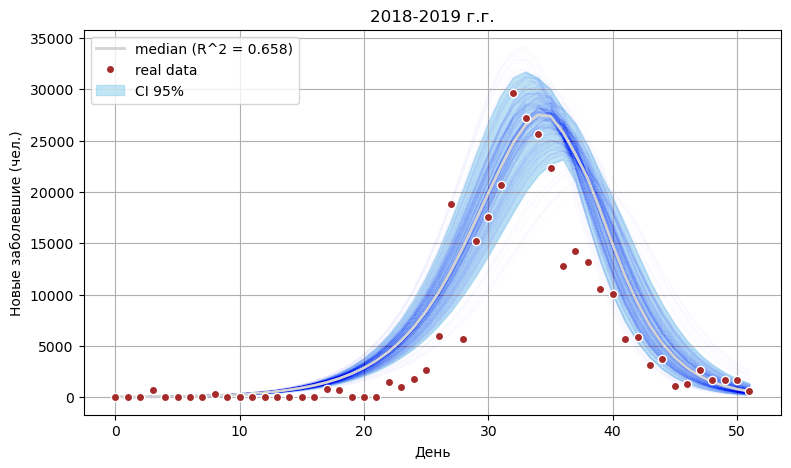

In [ ]:
with_rho = False
with_initi = False

plot_funcs.plots(idata, data, year, simulation_func, cal_model=d,
          with_trace=False, with_rho=with_rho, with_initi=with_initi,
          show_values=True, for_pred=False)

In [11]:
year = 2018
data_orig = EpidData('spb', './', f'7-01-{year}', f'6-20-{year+1}')
init_infect = [100, 100]

# duration in pm.simulator -- 52 days, 
# since agegroup model.simulate already creates two lists (52days) and merges them
model = FactoryBRModel.age_group()

d = Calibration(init_infect, model, data_orig)
idata, data, simulation_func, pm_model = d.mcmc_calibration(tune=1000, 
                                                            draws=500, 
                                                            chains=2)

The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


[autoreload of cutils_ext failed: Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\envs\epid_rnf\Lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "C:\ProgramData\anaconda3\envs\epid_rnf\Lib\site-packages\IPython\extensions\autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\envs\epid_rnf\Lib\importlib\__init__.py", line 168, in reload
    raise ModuleNotFoundError(f"spec not found for the module {name!r}", name=name)
ModuleNotFoundError: spec not found for the module 'cutils_ext'
]


a: [0.39983258 0.47580142], b: [0.3438239  0.76780439 0.34997613 0.78232264], rho: 535193.0, init_inf: [100, 100]
a: [0.39983258 0.47580142], b: [0.3438239  0.76780439 0.34997613 0.78232264], rho: 535193.0, init_inf: [100, 100]


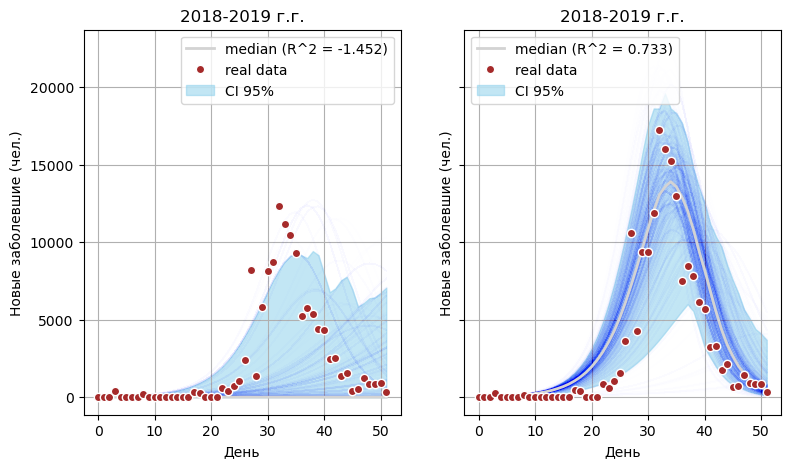

In [12]:
with_rho = False
with_initi = False

plot_funcs.plots(idata, data, year, simulation_func, cal_model=d,
          with_trace=False, with_rho=with_rho, with_initi=with_initi,
          show_values=True, for_pred=False)

[autoreload of cutils_ext failed: Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\envs\epid_rnf\Lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "C:\ProgramData\anaconda3\envs\epid_rnf\Lib\site-packages\IPython\extensions\autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\envs\epid_rnf\Lib\importlib\__init__.py", line 168, in reload
    raise ModuleNotFoundError(f"spec not found for the module {name!r}", name=name)
ModuleNotFoundError: spec not found for the module 'cutils_ext'
]


  0%|          | 0/10 [00:00<?, ?it/s]

The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is s

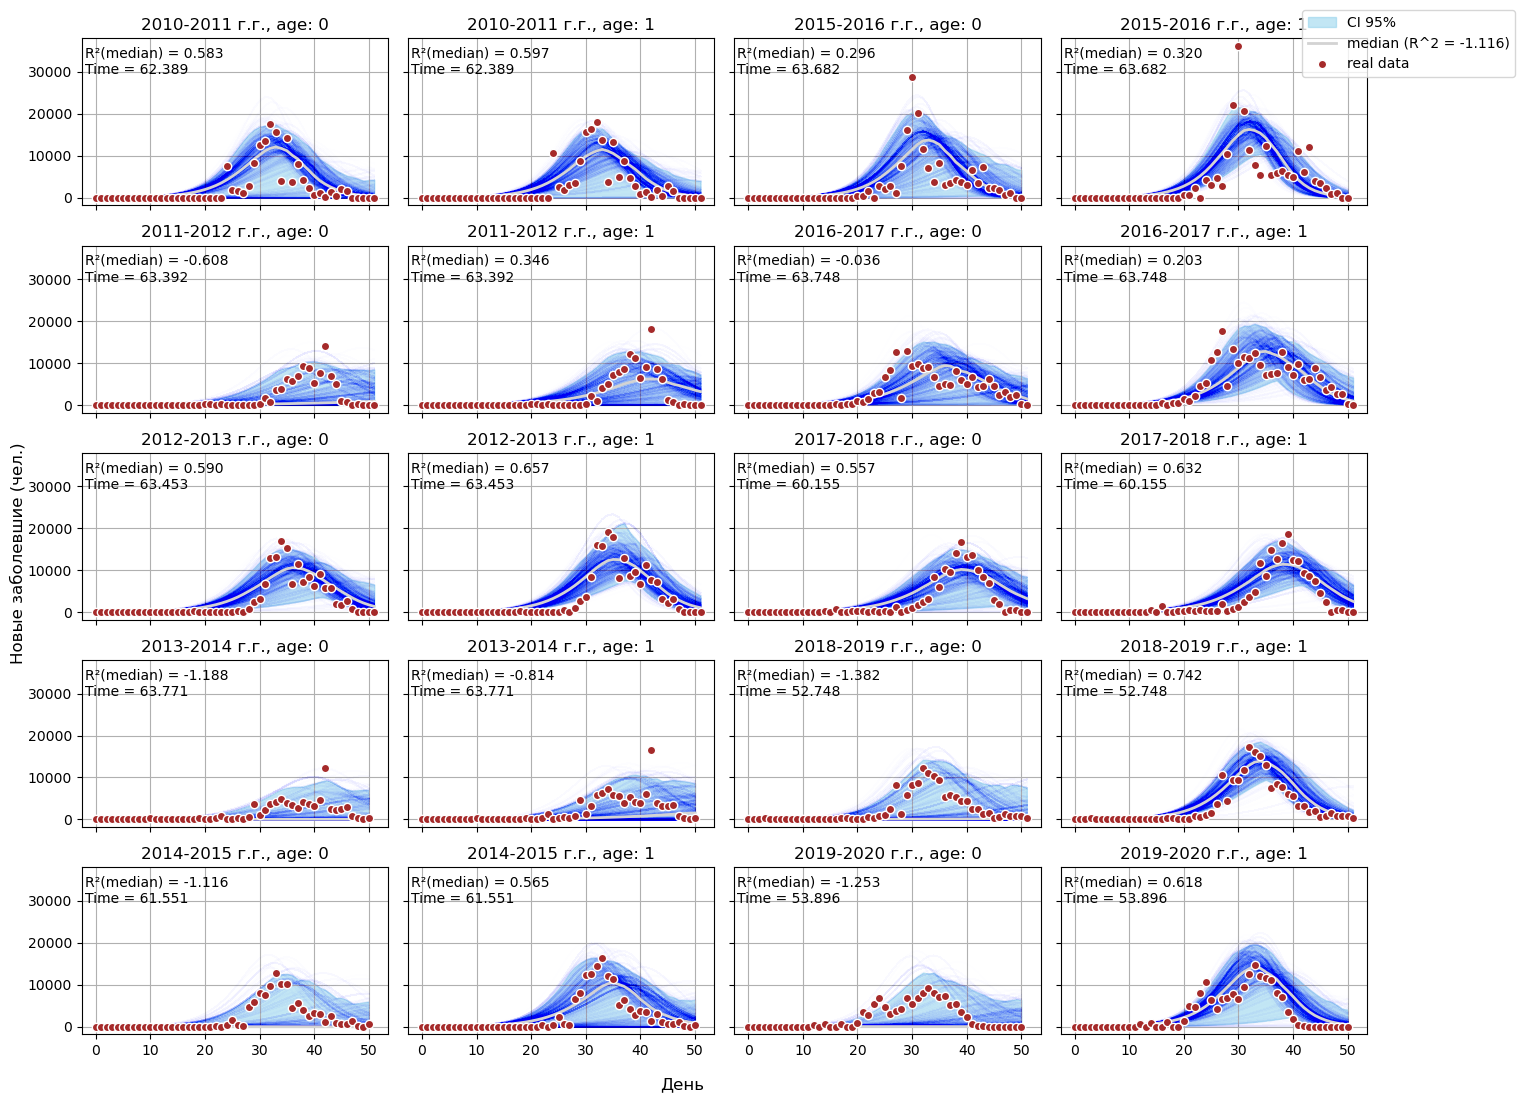

In [79]:
with_rho=False
with_initi=False

fig, ax = plt.subplots(5,2*alpha_len, sharex=True, sharey=True, figsize=(14,11));
init_infect = [100,100]
years = [2010,2011,2012,2013,2014,
         2015,2016,2017,2018,2019]

for idx, year in enumerate(tqdm(years)):
    data_orig = EpidData('spb', './', f'7-01-{year}', f'6-20-{year+1}')
    model = FactoryBRModel.age_group()
    d = Calibration(init_infect, model, data_orig)
    start = timer()
    idata, data, simulation_func, \
        pm_model = d.mcmc_calibration(with_rho=with_rho, with_initi=with_initi,
                                     tune=2500, draws=500, chains=4)
    end = timer()
    col = 0
    if year >= 2015:
        col = 2
        idx -= 5
    plot_funcs.fig_for_subplot(ax[idx], idata, data,
                               year, simulation_func,
                               cal_model=d, with_rho=with_rho, 
                               with_initi=with_initi, time = end-start)
    
fig.supxlabel('День')   
fig.supylabel('Новые заболевшие (чел.)')

handles, labels = ax[-1,0].get_legend_handles_labels()
fig.tight_layout()
fig.legend(handles, labels, bbox_to_anchor=(1.1, 1));

[autoreload of cutils_ext failed: Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\envs\epid_rnf\Lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "C:\ProgramData\anaconda3\envs\epid_rnf\Lib\site-packages\IPython\extensions\autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\envs\epid_rnf\Lib\importlib\__init__.py", line 168, in reload
    raise ModuleNotFoundError(f"spec not found for the module {name!r}", name=name)
ModuleNotFoundError: spec not found for the module 'cutils_ext'
]


  0%|          | 0/10 [00:00<?, ?it/s]

The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is s

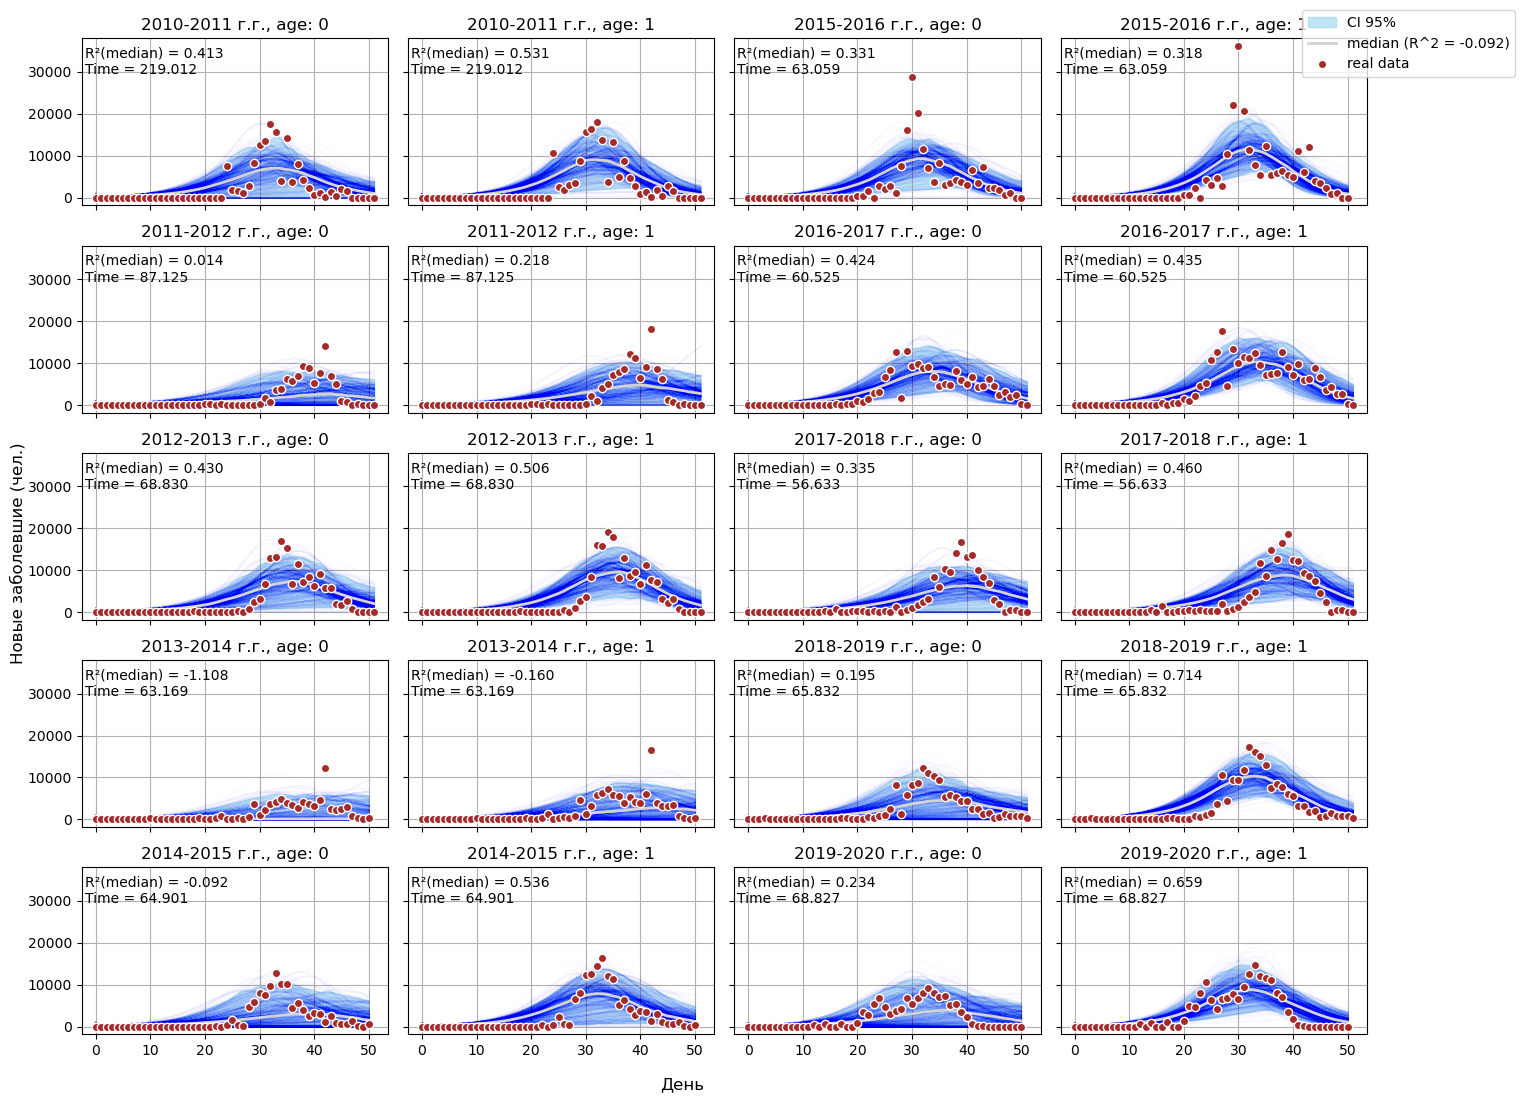

In [78]:
with_rho=False
with_initi=True

fig, ax = plt.subplots(5,2*alpha_len, sharex=True, sharey=True, figsize=(14,11));
init_infect = [100,100]
years = [2010,2011,2012,2013,2014,
         2015,2016,2017,2018,2019]

for idx, year in enumerate(tqdm(years)):
    data_orig = EpidData('spb', './', f'7-01-{year}', f'6-20-{year+1}')
    model = FactoryBRModel.age_group()
    d = Calibration(init_infect, model, data_orig)
    start = timer()
    idata, data, simulation_func, \
        pm_model = d.mcmc_calibration(with_rho=with_rho, with_initi=with_initi,
                                     tune=2500, draws=500, chains=4)
    end = timer()
    col = 0
    if year >= 2015:
        col = 2
        idx -= 5
    plot_funcs.fig_for_subplot(ax[idx], idata, data,
                               year, simulation_func,
                               cal_model=d, with_rho=with_rho, 
                               with_initi=with_initi, time = end-start)
    
fig.supxlabel('День')   
fig.supylabel('Новые заболевшие (чел.)')

handles, labels = ax[-1,0].get_legend_handles_labels()
fig.tight_layout()
fig.legend(handles, labels, bbox_to_anchor=(1.1, 1));

## + predictions

  0%|          | 0/10 [00:00<?, ?it/s]

The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is s

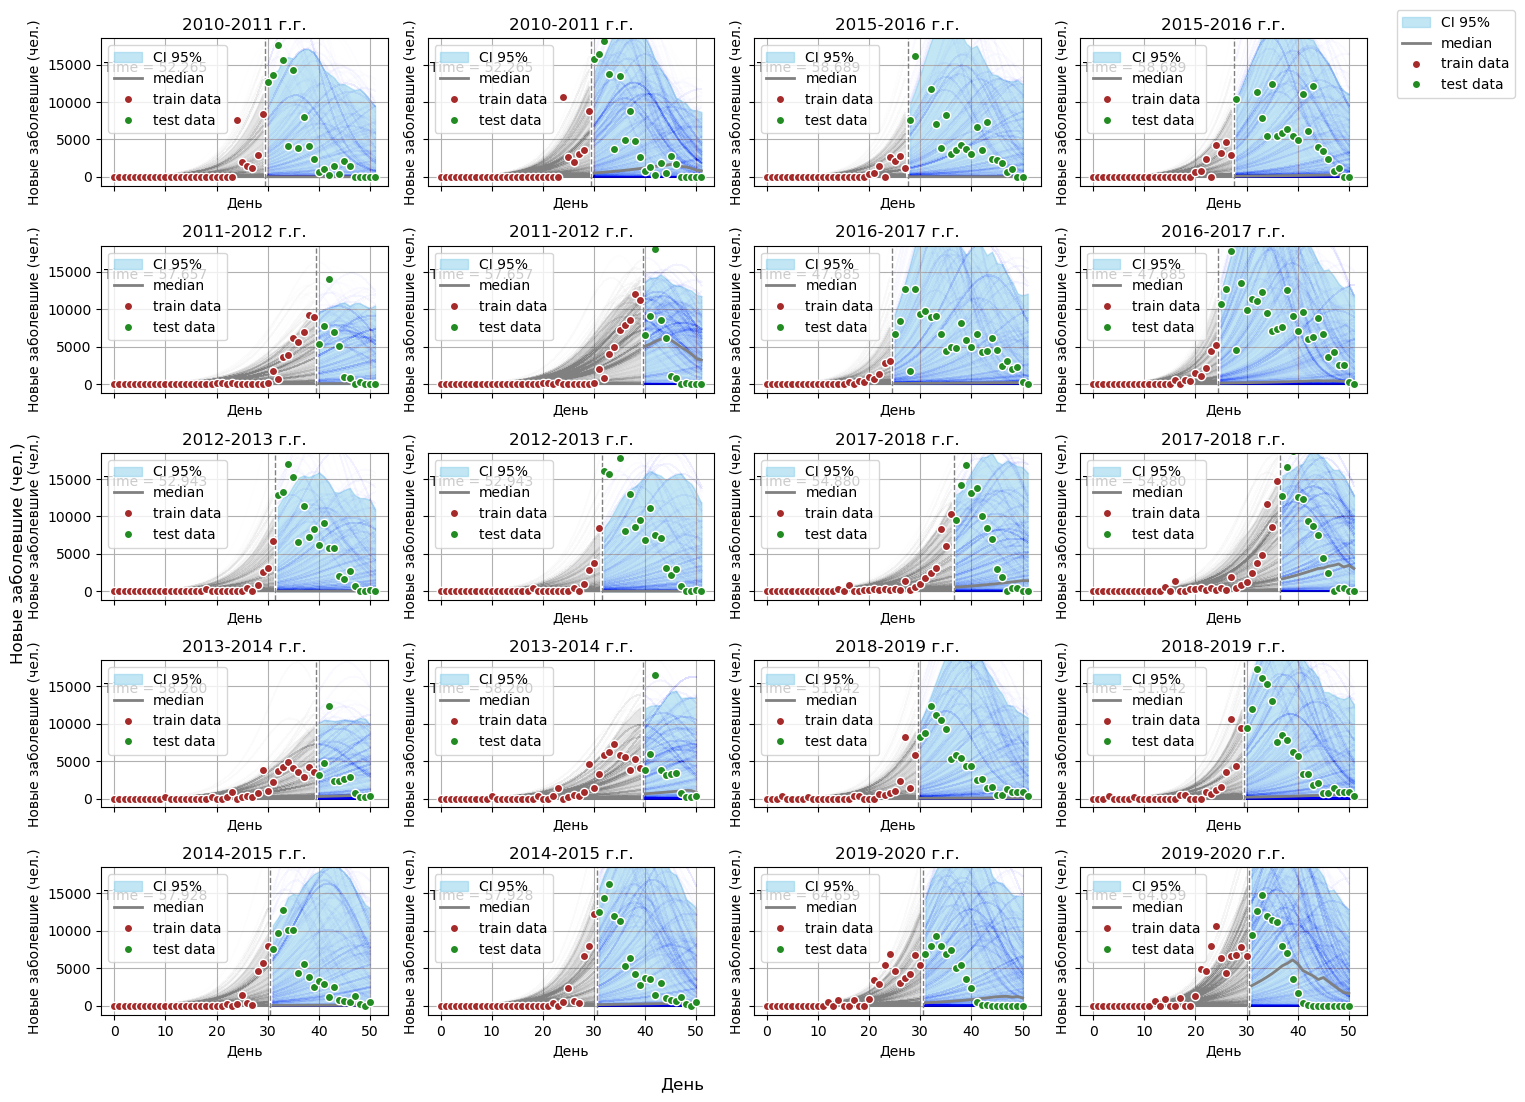

In [3]:
with_rho=False
with_initi=False
weeks_bfr = 3
alpha_len = 2
fig, ax = plt.subplots(5,2*alpha_len, sharex=True, sharey=True, figsize=(14,11));
init_infect = [100,100]
years = [2010,2011,2012,2013,2014,
         2015,2016,2017,2018,2019]
for idx, year in enumerate(tqdm(years)):
    data_orig = EpidData('spb', './', f'7-01-{year}', f'6-20-{year+1}')
    peak_idx = data_orig.reset_index(drop=True)['total'].nlargest(1).index[0]
    data_train, data_test = data_orig.iloc[:peak_idx-weeks_bfr+1
                                          ], data_orig.iloc[peak_idx-weeks_bfr+1:]

    model = FactoryBRModel.age_group()
    d = Calibration(init_infect, model, data_train)
    start = timer()
    idata, data, simulation_func, \
                pm_model = d.mcmc_calibration(with_rho=with_rho,
                                              with_initi=with_initi,
                                              tune=2500, draws=500, 
                                             chains=4)
    pp = plot_funcs.predictions(simulation_func, idata, 
                            duration=data_orig.shape[0], cal_model=d,
                         with_rho=with_rho, with_initi=with_initi) 
    end = timer()
    
    data_mtest,_,_ = d.model.params(data_test) 
    col = 0
    if year >= 2015:
        col = 2
        idx-=5
    plot_funcs.pred_plot_ax(ax[idx], year, data, data_mtest, 
                               pp, idata, with_ylim=True, time = end-start)
    
fig.supxlabel('День')   
fig.supylabel('Новые заболевшие (чел.)')

handles, labels = ax[-1,0].get_legend_handles_labels()
fig.tight_layout()
fig.legend(handles, labels, bbox_to_anchor=(1.1, 1));

In [4]:
1

1

[autoreload of cutils_ext failed: Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\envs\epid_rnf\Lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "C:\ProgramData\anaconda3\envs\epid_rnf\Lib\site-packages\IPython\extensions\autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\envs\epid_rnf\Lib\importlib\__init__.py", line 168, in reload
    raise ModuleNotFoundError(f"spec not found for the module {name!r}", name=name)
ModuleNotFoundError: spec not found for the module 'cutils_ext'
]


  0%|          | 0/10 [00:00<?, ?it/s]

The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is s

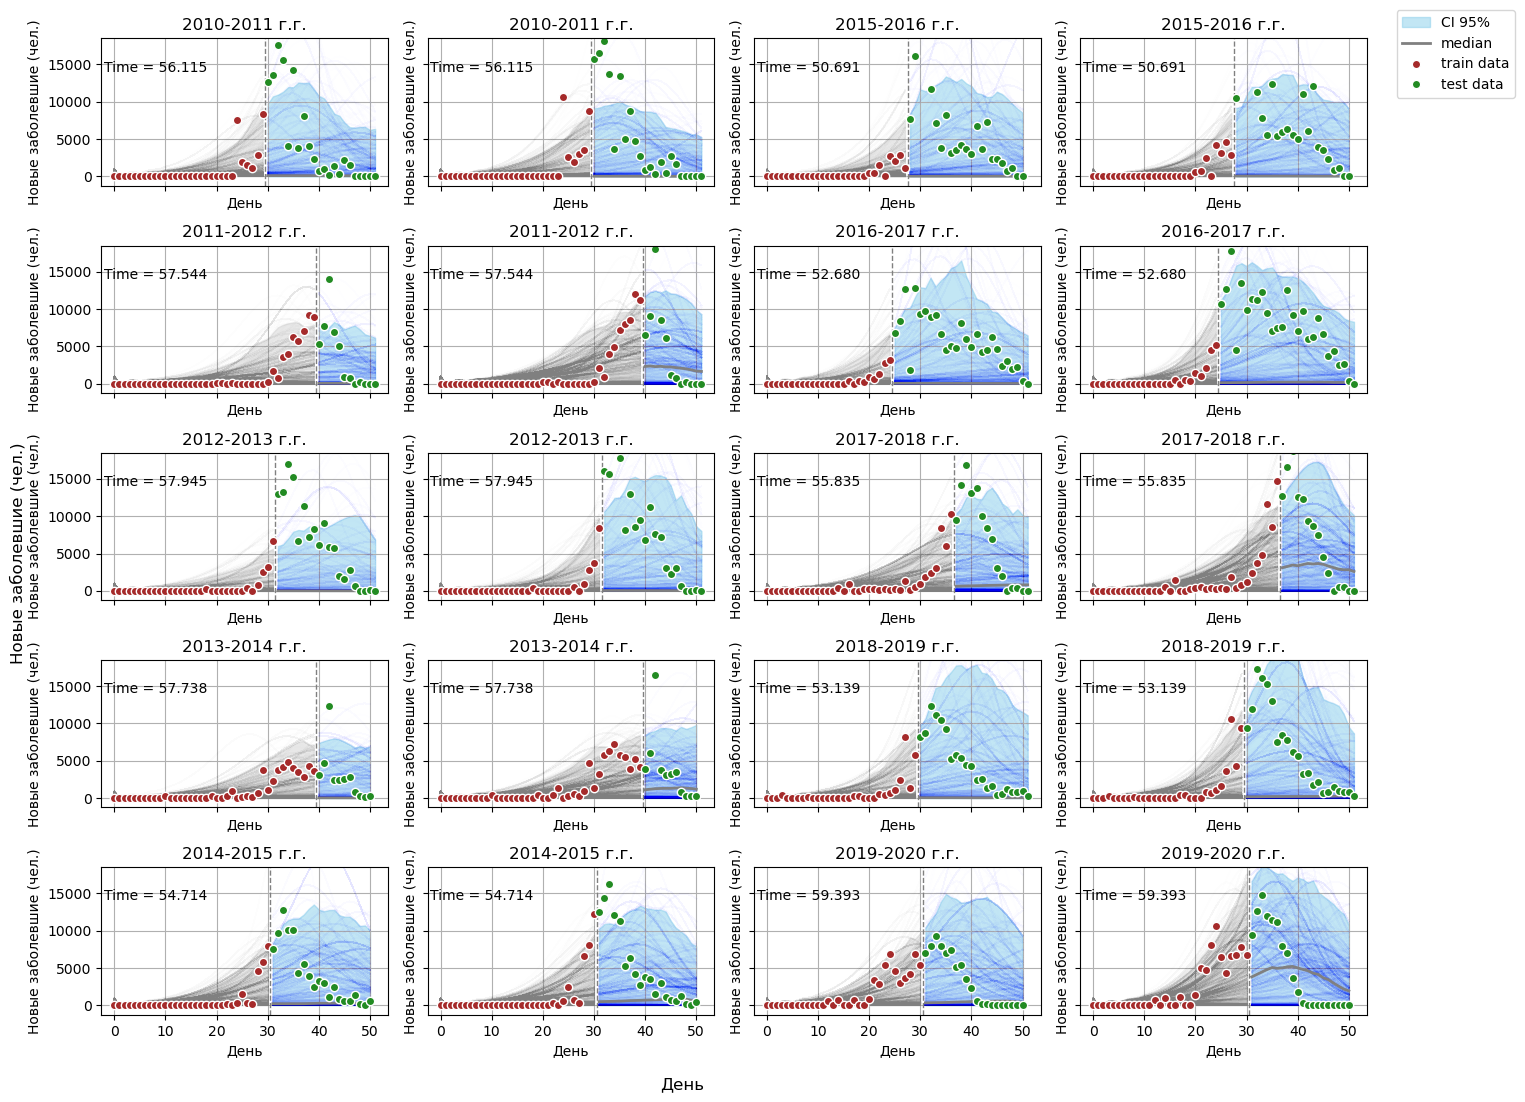

In [7]:
with_rho=False
with_initi=True
weeks_bfr = 3

fig, ax = plt.subplots(5,2*alpha_len, sharex=True, sharey=True, figsize=(14,11));
init_infect = [100,100]
years = [2010,2011,2012,2013,2014,
         2015,2016,2017,2018,2019]

for idx, year in enumerate(tqdm(years)):
    data_orig = EpidData('spb', './', f'7-01-{year}', f'6-20-{year+1}')
    peak_idx = data_orig.reset_index(drop=True)['total'].nlargest(1).index[0]
    data_train, data_test = data_orig.iloc[:peak_idx-weeks_bfr+1
                                          ], data_orig.iloc[peak_idx-weeks_bfr+1:]

    model = FactoryBRModel.age_group()
    d = Calibration(init_infect, model, data_train)
    start = timer()
    idata, data, simulation_func, \
                pm_model = d.mcmc_calibration(with_rho=with_rho,
                                              with_initi=with_initi,
                                              tune=2500, draws=500, 
                                             chains=4)
    pp = plot_funcs.predictions(simulation_func, idata, 
                            duration=data_orig.shape[0], cal_model=d,
                         with_rho=with_rho, with_initi=with_initi) 
    end = timer()
    
    data_mtest,_,_ = d.model.params(data_test) 
    col = 0
    if year >= 2015:
        col = 2
        idx-=5
    plot_funcs.pred_plot_ax(ax[idx], year, data, data_mtest, 
                               pp, idata, with_ylim=True, time = end-start)
    
fig.supxlabel('День')   
fig.supylabel('Новые заболевшие (чел.)')

handles, labels = ax[-1,0].get_legend_handles_labels()
fig.tight_layout()
fig.legend(handles, labels, bbox_to_anchor=(1.1, 1));

In [8]:
2

[autoreload of cutils_ext failed: Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\envs\epid_rnf\Lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "C:\ProgramData\anaconda3\envs\epid_rnf\Lib\site-packages\IPython\extensions\autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\envs\epid_rnf\Lib\importlib\__init__.py", line 168, in reload
    raise ModuleNotFoundError(f"spec not found for the module {name!r}", name=name)
ModuleNotFoundError: spec not found for the module 'cutils_ext'
]


2

# checking plots

In [4]:
init_infect = [100]
year=2011
weeks_bfr=3
with_rho = True
with_initi = True

data_orig = EpidData('spb', './', f'7-01-{year}', f'6-20-{year+1}')
peak_idx = data_orig.reset_index(drop=True)['total'].nlargest(1).index[0]
data_train, data_test = data_orig.iloc[:peak_idx-weeks_bfr+1
                                      ], data_orig.iloc[peak_idx-weeks_bfr+1:]

model = FactoryBRModel.total()
d = Calibration(init_infect, model, data_train)
idata, data, simulation_func, pm_model, rho = d.mcmc_calibration(with_rho=with_rho,
                                                            with_initi=with_initi,
                                                            tune=1000, draws=500, 
                                                            chains=4)

The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


a: 0.820, b: 0.681, rho: 2950826.511, init_inf: 365.631


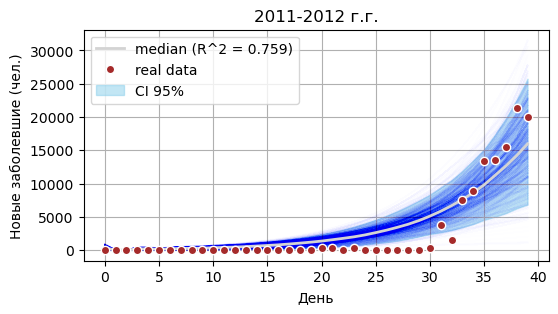

In [5]:
plot_funcs.plots(idata, data, year, simulation_func,
                 with_rho=with_rho, 
      with_initi=with_initi, for_pred=True, 
      with_trace=False)

In [6]:
alpha_len = (1,)

with pm.Model() as forecast_m:
    alpha = pm.Flat(name="a", shape=alpha_len)
    beta = pm.Flat(name="b", shape=alpha_len)
    rho = pm.Uniform(name="rho")
    init_inf = pm.Uniform(name="init_inf", shape=alpha_len)
    
    pm.Simulator("sim_forecast", simulation_func, alpha, beta,
                 rho, init_inf, [data_orig.shape[0]], epsilon=10000)
    pp = pm.sample_posterior_predictive(idata, var_names=['sim_forecast'], 
                                        predictions=True,progressbar=False)


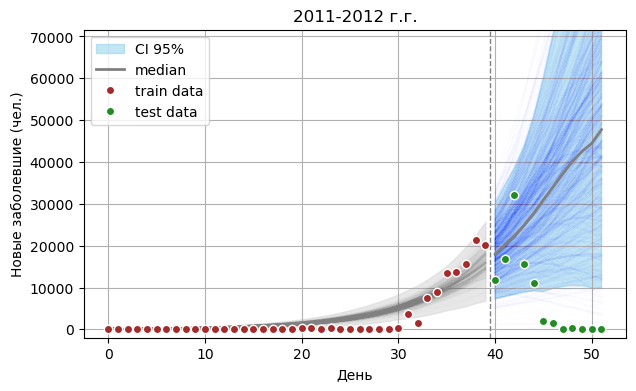

In [7]:
plot_funcs.pred_plot(year, data_train, data_test,
                     pp, idata, with_ylim=True)

In [169]:
year=2011
weeks_bfr=3
with_rho = False
with_initi = True
init_infect = [100,100]

data_orig = EpidData('spb', './', f'7-01-{year}', f'6-20-{year+1}')
peak_idx = data_orig.reset_index(drop=True)['total'].nlargest(1).index[0]
data_train, data_test = data_orig.iloc[:peak_idx-weeks_bfr+1
                                      ], data_orig.iloc[peak_idx-weeks_bfr+1:]

model = FactoryBRModel.age_group()
d = Calibration(init_infect, model, data_train)
idata, data, simulation_func, pm_model = d.mcmc_calibration(with_rho=with_rho,
                                                            with_initi=with_initi,
                                                            tune=1500, draws=500, 
                                                            chains=2)

The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


[autoreload of cutils_ext failed: Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\envs\epid_rnf\Lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "C:\ProgramData\anaconda3\envs\epid_rnf\Lib\site-packages\IPython\extensions\autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\envs\epid_rnf\Lib\importlib\__init__.py", line 168, in reload
    raise ModuleNotFoundError(f"spec not found for the module {name!r}", name=name)
ModuleNotFoundError: spec not found for the module 'cutils_ext'
]


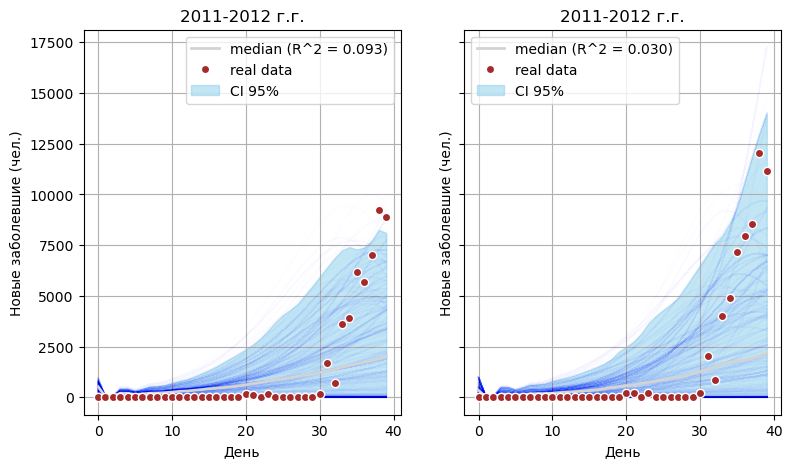

In [170]:
plot_funcs.plots(idata, data, year, simulation_func, cal_model=d,
          with_trace=False, with_rho=with_rho, with_initi=with_initi,
          show_values=True, for_pred=False)

In [263]:
pp = plot_funcs.predictions(simulation_func, idata, 
                            duration=data_orig.shape[0], cal_model=d,
                         with_rho=with_rho, with_initi=with_initi) 

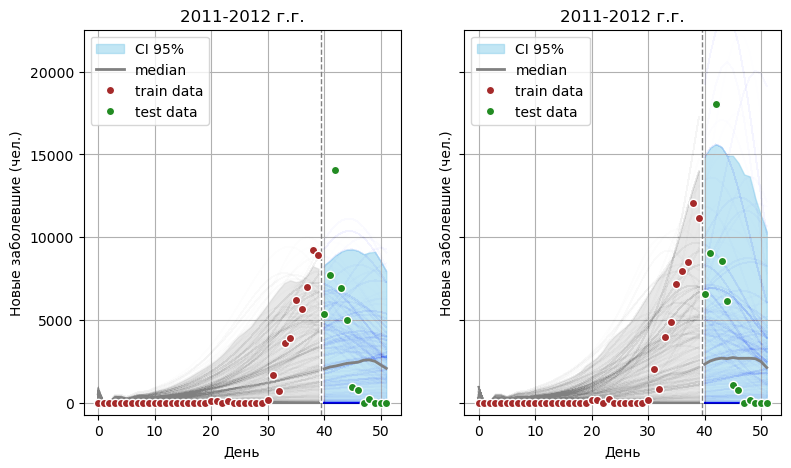

In [267]:
data_mtest,_,_ = d.model.params(data_test)

plot_funcs.pred_plot(year, data, data_mtest,
                 pp, idata, with_ylim=True)

# Predictions

[autoreload of cutils_ext failed: Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\envs\epid_rnf\Lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "C:\ProgramData\anaconda3\envs\epid_rnf\Lib\site-packages\IPython\extensions\autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\envs\epid_rnf\Lib\importlib\__init__.py", line 168, in reload
    raise ModuleNotFoundError(f"spec not found for the module {name!r}", name=name)
ModuleNotFoundError: spec not found for the module 'cutils_ext'
]


  0%|          | 0/10 [00:00<?, ?it/s]

The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is s

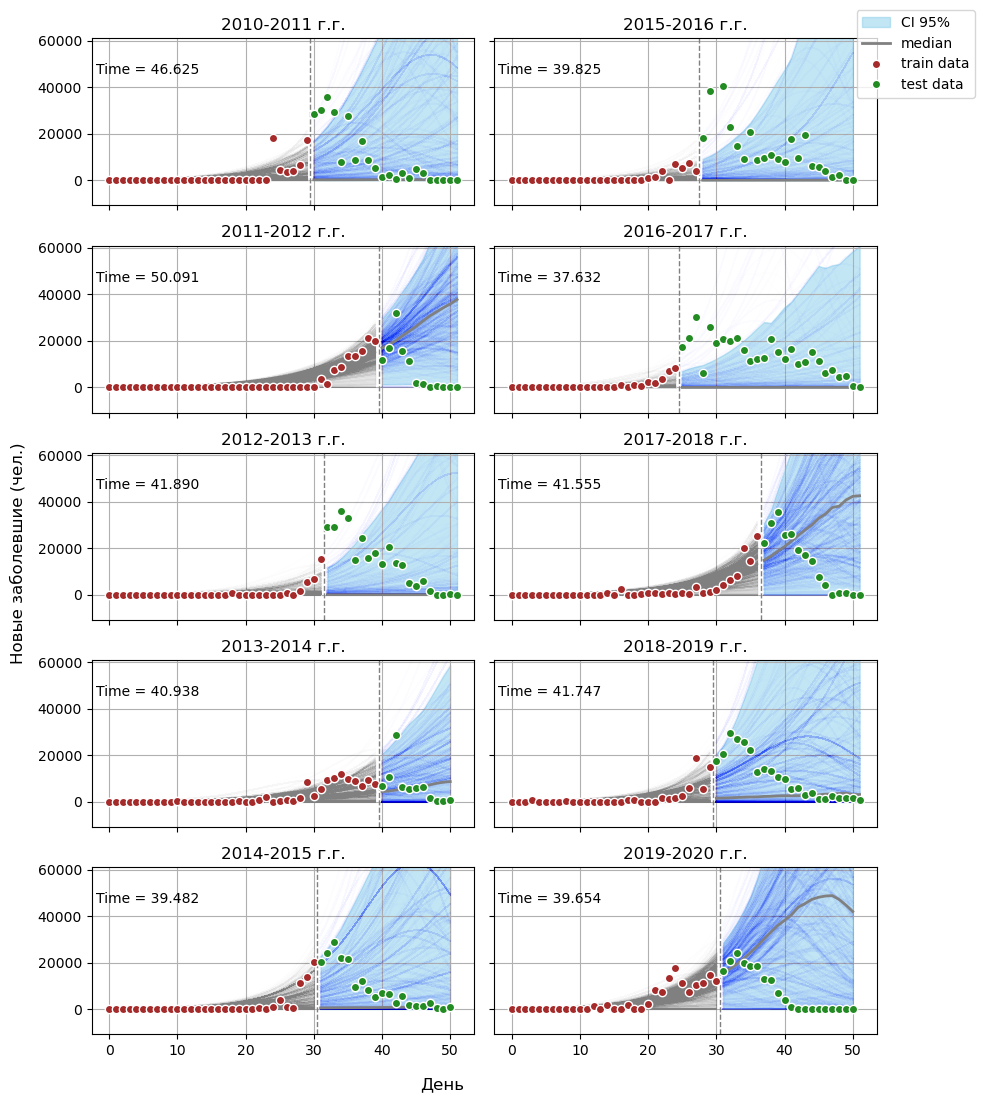

In [273]:
years = [2010,2011,2012,2013,2014,2015,
        2016,2017,2018,2019]

plot_funcs.grid_plots(with_rho=True, with_initi=True, weeks_bfr = 3,
                      years = years,
                      tune=1000, draws=500, chains=4)

[autoreload of cutils_ext failed: Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\envs\epid_rnf\Lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "C:\ProgramData\anaconda3\envs\epid_rnf\Lib\site-packages\IPython\extensions\autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\envs\epid_rnf\Lib\importlib\__init__.py", line 168, in reload
    raise ModuleNotFoundError(f"spec not found for the module {name!r}", name=name)
ModuleNotFoundError: spec not found for the module 'cutils_ext'
]


  0%|          | 0/10 [00:00<?, ?it/s]

The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is s

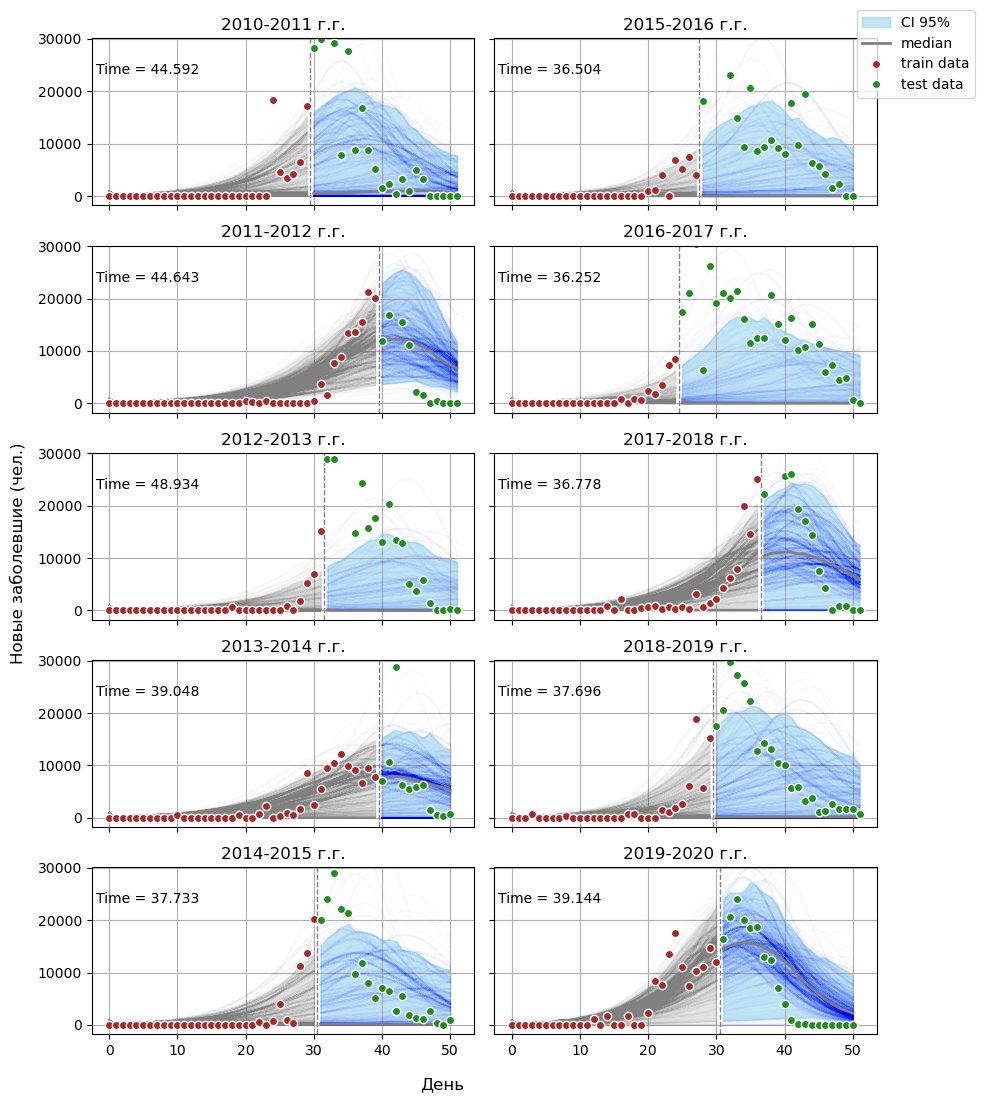

In [274]:
years = [2010,2011,2012,2013,2014,2015,
        2016,2017,2018,2019]

plot_funcs.grid_plots(with_rho=False, with_initi=True, weeks_bfr = 3,
                      years = years,
                      tune=1000, draws=500, chains=4)

[autoreload of cutils_ext failed: Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\envs\epid_rnf\Lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "C:\ProgramData\anaconda3\envs\epid_rnf\Lib\site-packages\IPython\extensions\autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\envs\epid_rnf\Lib\importlib\__init__.py", line 168, in reload
    raise ModuleNotFoundError(f"spec not found for the module {name!r}", name=name)
ModuleNotFoundError: spec not found for the module 'cutils_ext'
]


  0%|          | 0/10 [00:00<?, ?it/s]

The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is s

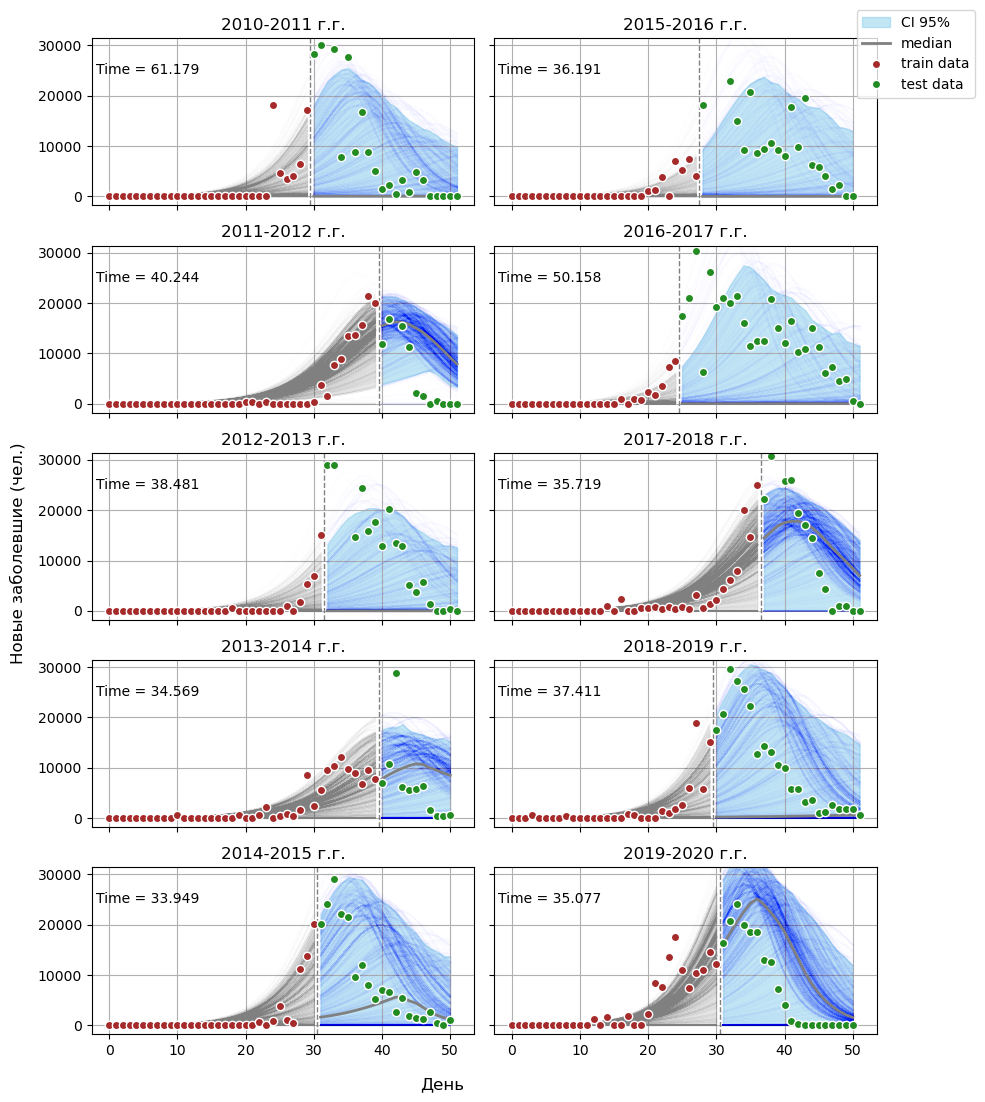

In [275]:
years = [2010,2011,2012,2013,2014,2015,
        2016,2017,2018,2019]

plot_funcs.grid_plots(with_rho=False, with_initi=False, weeks_bfr = 3,
                      years = years,
                      tune=1000, draws=500, chains=4)

# 52 weeks

  0%|          | 0/10 [00:00<?, ?it/s]

The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is s

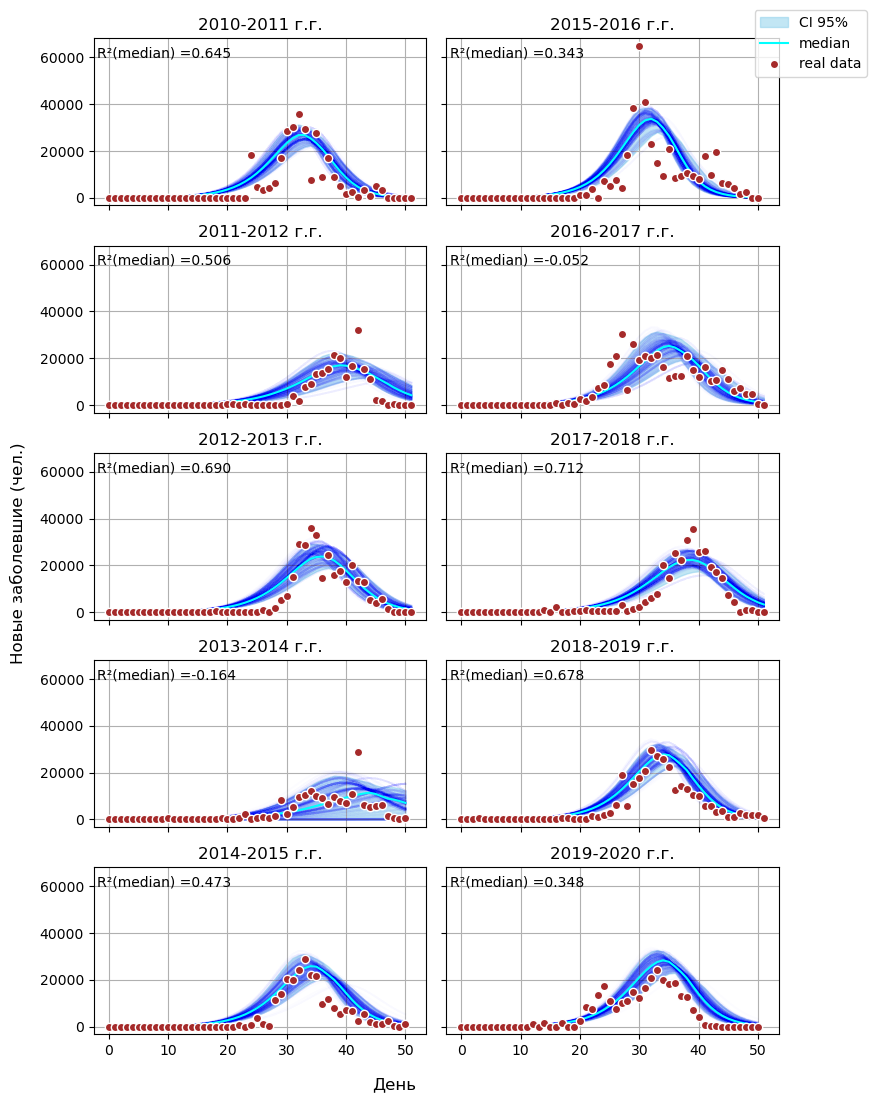

In [341]:
#epsilon=10000 tune=2500, draws=500
fig, ax = plt.subplots(5,2, sharex=True, sharey=True, figsize=(8,11))
init_infect = [100]

for idx, year in enumerate(tqdm([2010,2011,2012,2013,2014,
                                2015,2016,2017,2018,2019])):
    data_orig = EpidData('spb', './', f'7-01-{year}', f'6-20-{year+1}')
    model = TotalBRModel()
    d = Calibration(init_infect, model, data_orig)
    idata, data, simulation_func, pm_model = d.mcmc_calibration()
    col = 0
    if year >= 2015:
        col = 1
        idx -= 5
    fig_for_subplot(ax[idx, col], idata, year)
    
fig.supxlabel('День')   
fig.supylabel('Новые заболевшие (чел.)')

handles, labels = ax[-1,0].get_legend_handles_labels()
fig.tight_layout()
fig.legend(handles, labels, bbox_to_anchor=(1.1, 1));

## 52 weeks; rho

  0%|          | 0/10 [00:00<?, ?it/s]

The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is s

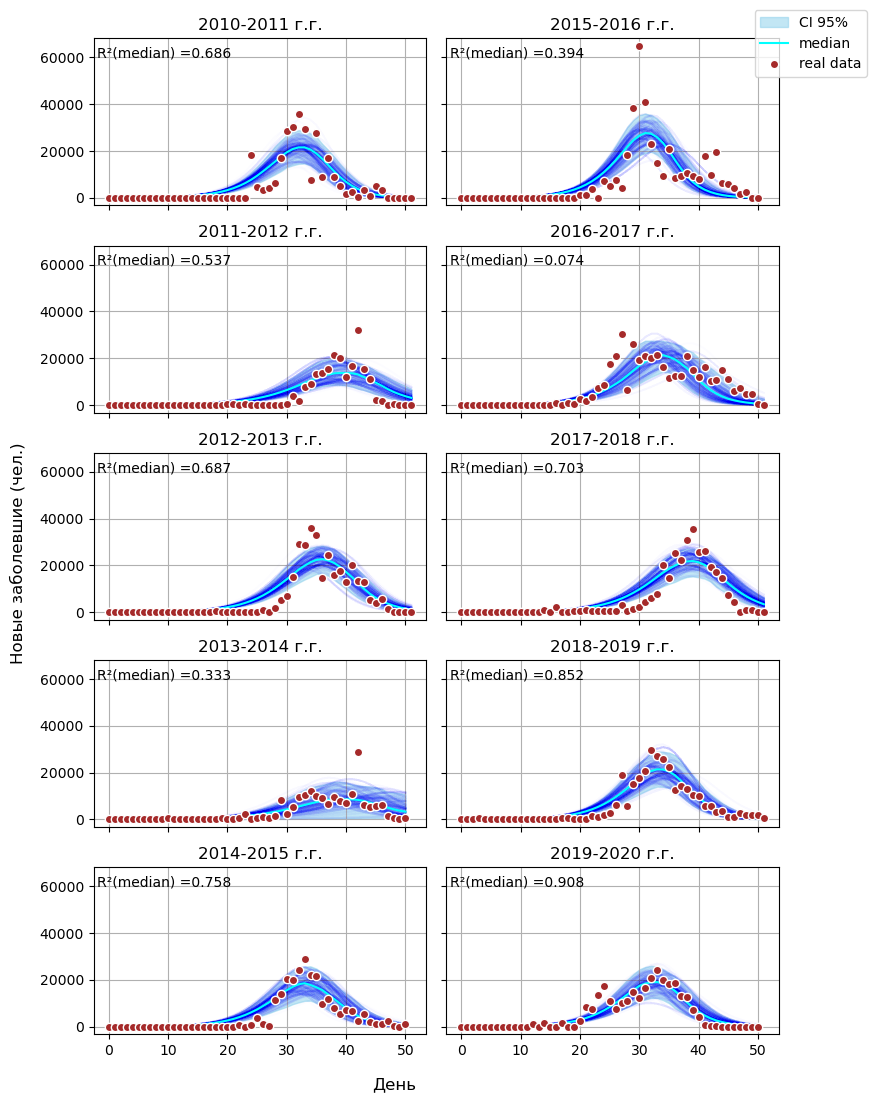

In [336]:
# 52 д.; rho с априорным
fig, ax = plt.subplots(5,2, sharex=True, sharey=True, figsize=(8,11))
init_infect = [100]
rrho = []
for idx, year in enumerate(tqdm([2010,2011,2012,2013,2014,
                                2015,2016,2017,2018,2019])):
    data_orig = EpidData('spb', './', f'7-01-{year}', f'6-20-{year+1}')
    model = TotalBRModel()
    d = Calibration(init_infect, model, data_orig)
    idata, data, simulation_func, pm_model = d.mcmc_calibration(with_rho=True)
    posterior = idata.posterior.stack(samples=("draw", "chain"))
    rrho.append(posterior["rho"].median().values)
    
    col = 0
    if year >= 2015:
        col = 1
        idx -= 5
    fig_for_subplot(ax[idx, col], idata, year, with_rho=True)
    
fig.supxlabel('День')   
fig.supylabel('Новые заболевшие (чел.)')

handles, labels = ax[-1,0].get_legend_handles_labels()
fig.tight_layout()
fig.legend(handles, labels, bbox_to_anchor=(1.1, 1));

## 52 weeks; rho and init_infect

  0%|          | 0/10 [00:00<?, ?it/s]

The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is s

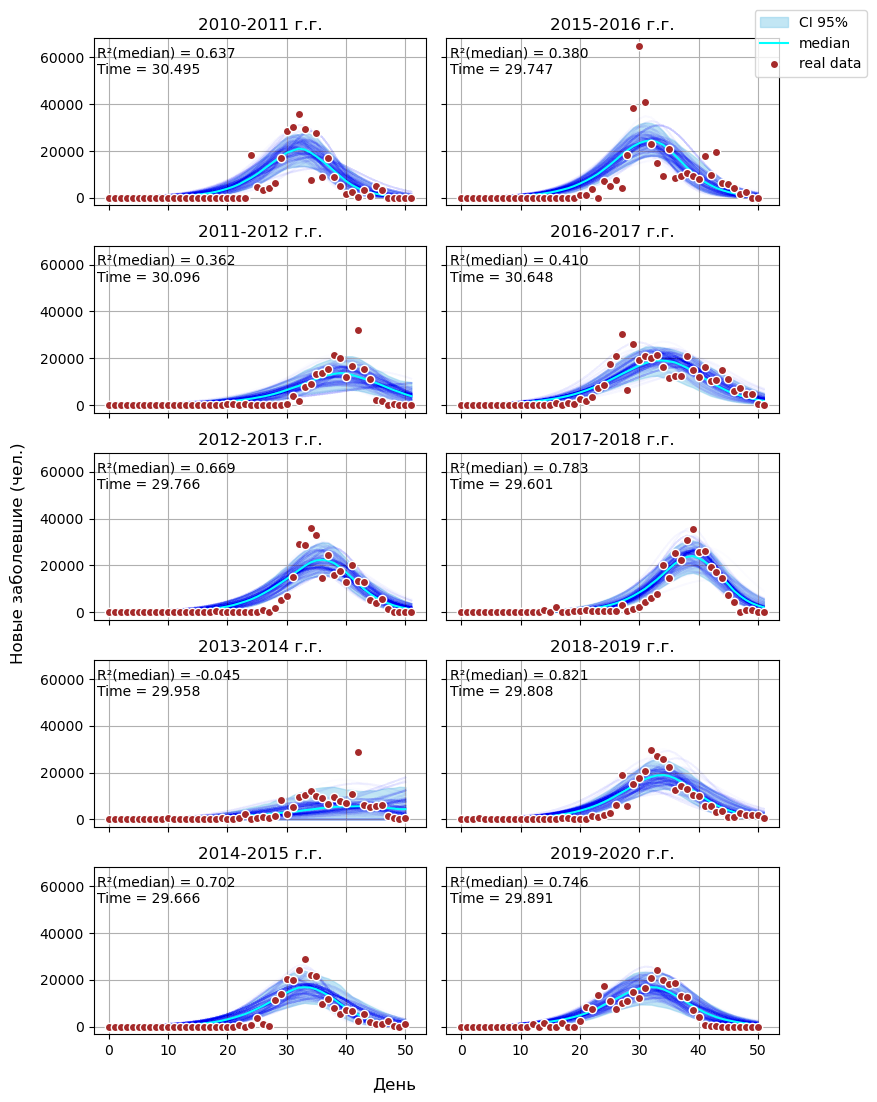

In [14]:
fig, ax = plt.subplots(5,2, sharex=True, sharey=True, figsize=(8,11))
init_infect = [100]
rrho, ii, alphas, betas = [], [], [], []

for idx, year in enumerate(tqdm([2010,2011,2012,2013,2014,
                                2015,2016,2017,2018,2019])):
    data_orig = EpidData('spb', './', f'7-01-{year}', f'6-20-{year+1}')
    model = TotalBRModel()
    d = Calibration(init_infect, model, data_orig)
    
    start = timer()
    idata, data, simulation_func, pm_model = d.mcmc_calibration(with_rho=True, with_initi=True, 
                                                                verbose=False)
    end = timer()
    posterior = idata.posterior.stack(samples=("draw", "chain"))
    rrho.append(posterior["rho"].median().values)
    ii.append(posterior["init_inf"].median().values)
    alphas.append(posterior["a"].median().values)
    betas.append(posterior["b"].median().values)
    
    col = 0
    if year >= 2015:
        col = 1
        idx -= 5
        
    fig_for_subplot(ax[idx, col], idata, year, with_rho=True, with_initi=True, 
                    time=end-start)
    
fig.supxlabel('День')   
fig.supylabel('Новые заболевшие (чел.)')

handles, labels = ax[-1,0].get_legend_handles_labels()
fig.tight_layout()
fig.legend(handles, labels, bbox_to_anchor=(1.1, 1));

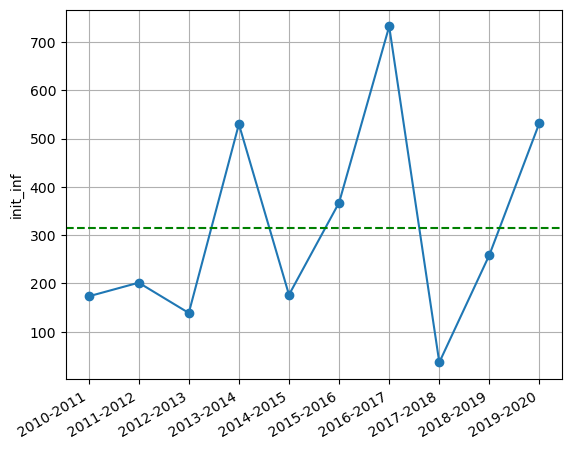

In [15]:
years = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
years_labels = [f'{i}-{i+1}' for i in years]

plt.plot(ii,'o-')
plt.grid()
plt.axhline(np.mean(ii), color='green', ls='--')
plt.ylabel('init_inf')
plt.xticks(np.arange(10),years_labels,rotation=30,ha='right');

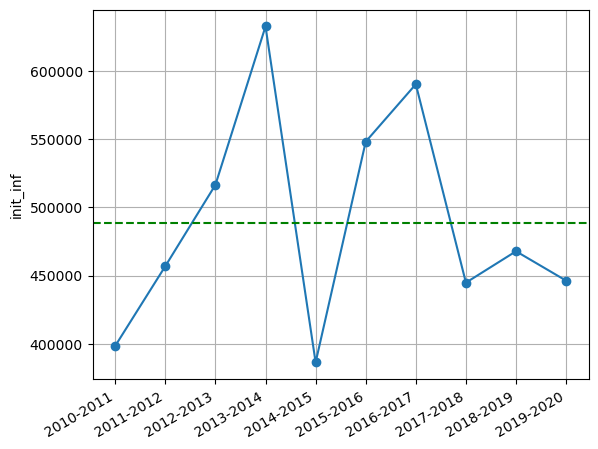

In [16]:
plt.plot(rrho,'o-')
plt.grid()
plt.axhline(np.mean(rrho), color='green', ls='--')
plt.ylabel('init_inf')
plt.xticks(np.arange(10),years_labels,rotation=30,ha='right');

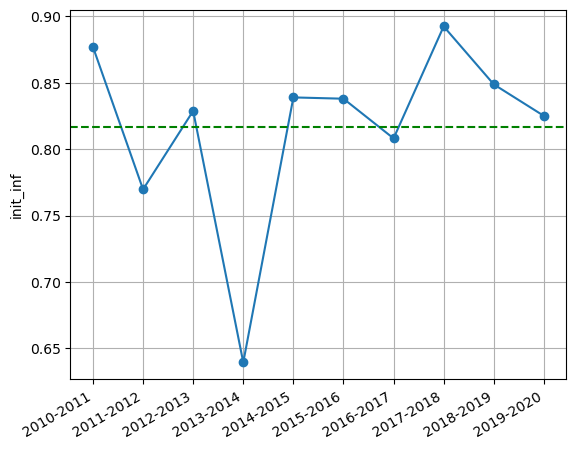

In [17]:
plt.plot(alphas,'o-')
plt.grid()
plt.axhline(np.mean(alphas), color='green', ls='--')
plt.ylabel('init_inf')
plt.xticks(np.arange(10),years_labels,rotation=30,ha='right');

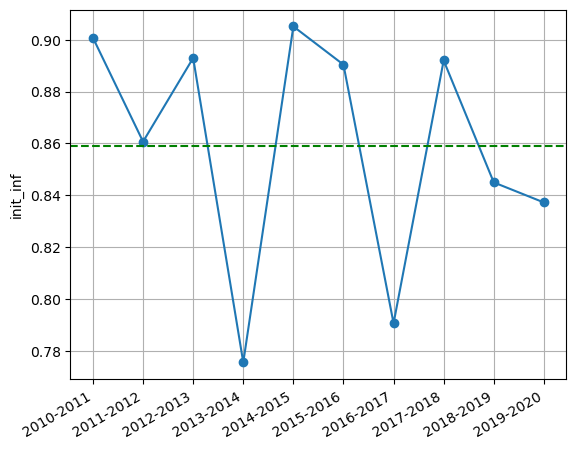

In [18]:
plt.plot(betas,'o-')
plt.grid()
plt.axhline(np.mean(betas), color='green', ls='--')
plt.ylabel('init_inf')
plt.xticks(np.arange(10),years_labels,rotation=30,ha='right');

## 52 weeks; init_infect

  0%|          | 0/10 [00:00<?, ?it/s]

The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is s

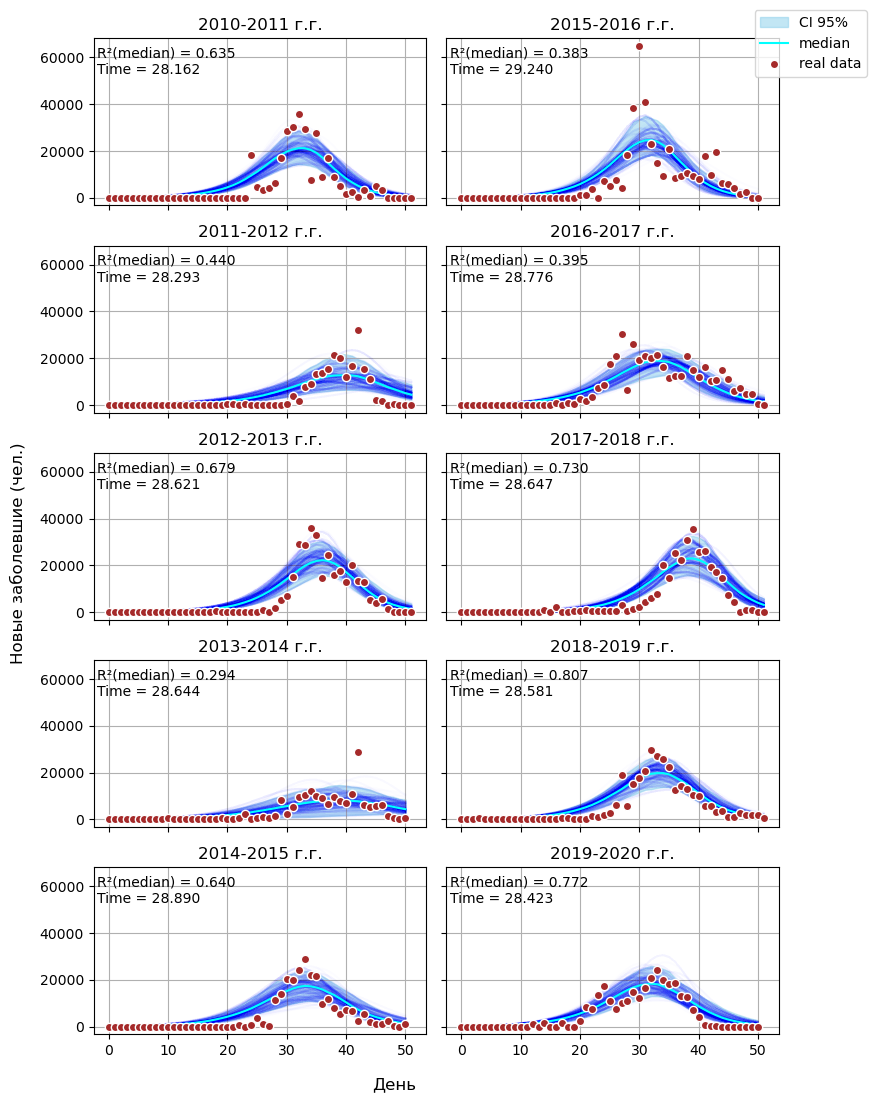

In [25]:
fig, ax = plt.subplots(5,2, sharex=True, sharey=True, figsize=(8,11))
init_infect = [100]
rrho, ii, alphas, betas = [], [], [], []

for idx, year in enumerate(tqdm([2010,2011,2012,2013,2014,
                                2015,2016,2017,2018,2019])):
    data_orig = EpidData('spb', './', f'7-01-{year}', f'6-20-{year+1}')
    model = TotalBRModel()
    d = Calibration(init_infect, model, data_orig)
    
    start = timer()
    idata, data, simulation_func, pm_model = d.mcmc_calibration(with_rho=False, with_initi=True, 
                                                                verbose=False)
    end = timer()
    posterior = idata.posterior.stack(samples=("draw", "chain"))
    #rrho.append(posterior["rho"].median().values)
    ii.append(posterior["init_inf"].median().values)
    alphas.append(posterior["a"].median().values)
    betas.append(posterior["b"].median().values)
    
    col = 0
    if year >= 2015:
        col = 1
        idx -= 5
        
    fig_for_subplot(ax[idx, col], idata, year, with_rho=False, with_initi=True, 
                    time=end-start)
    
fig.supxlabel('День')   
fig.supylabel('Новые заболевшие (чел.)')

handles, labels = ax[-1,0].get_legend_handles_labels()
fig.tight_layout()
fig.legend(handles, labels, bbox_to_anchor=(1.1, 1));

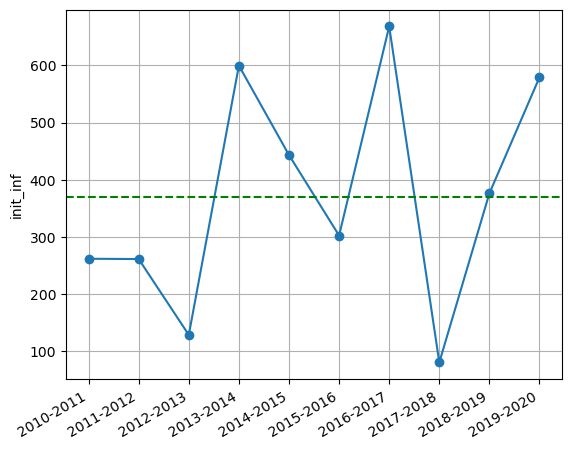

In [26]:
plt.plot(ii,'o-')
plt.grid()
plt.axhline(np.mean(ii), color='green', ls='--')
plt.ylabel('init_inf')
plt.xticks(np.arange(10),years_labels,rotation=30,ha='right');

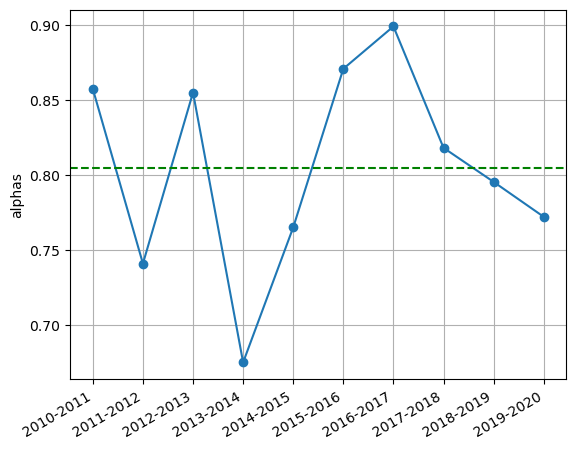

In [27]:
plt.plot(alphas,'o-')
plt.grid()
plt.axhline(np.mean(alphas), color='green', ls='--')
plt.ylabel('alphas')
plt.xticks(np.arange(10),years_labels,rotation=30,ha='right');

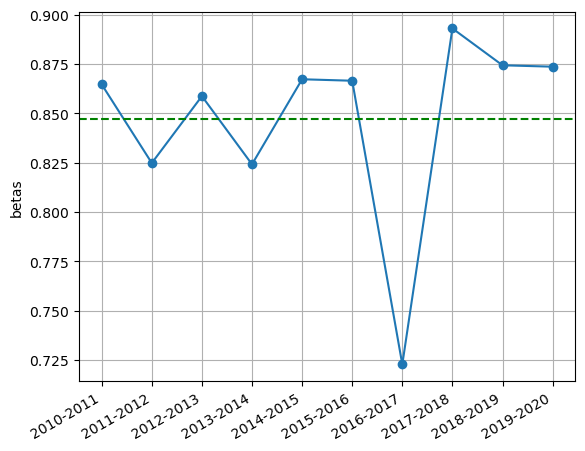

In [28]:
plt.plot(betas,'o-')
plt.grid()
plt.axhline(np.mean(betas), color='green', ls='--')
plt.ylabel('betas')
plt.xticks(np.arange(10),years_labels,rotation=30,ha='right');

  0%|          | 0/10 [00:00<?, ?it/s]

The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is s

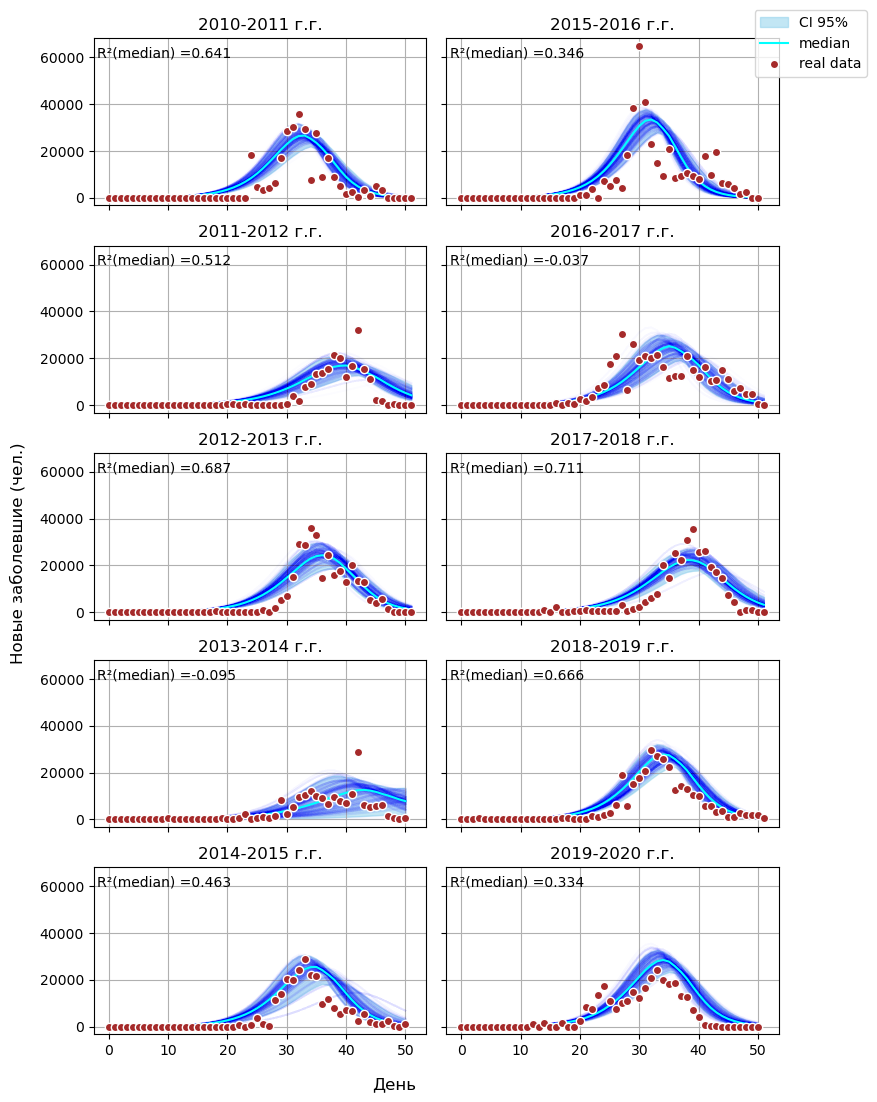

In [71]:
#epsilon=10000 tune=2500, draws=500 truncatednormal
fig, ax = plt.subplots(5,2, sharex=True, sharey=True, figsize=(8,11))
init_infect = [100]

for idx, year in enumerate(tqdm([2010,2011,2012,2013,2014,
                                2015,2016,2017,2018,2019])):
    data_orig = EpidData('spb', './', f'7-01-{year}', f'6-20-{year+1}')
    model = TotalBRModel()
    d = Calibration(init_infect, model, data_orig)
    idata, data, simulation_func, pm_model = d.mcmc_calibration()
    col = 0
    if year >= 2015:
        col = 1
        idx -= 5
    fig_for_subplot(ax[idx, col], idata, year)
    
fig.supxlabel('День')   
fig.supylabel('Новые заболевшие (чел.)')

handles, labels = ax[-1,0].get_legend_handles_labels()
fig.tight_layout()
fig.legend(handles, labels, bbox_to_anchor=(1.1, 1));

  0%|          | 0/10 [00:00<?, ?it/s]

The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is s

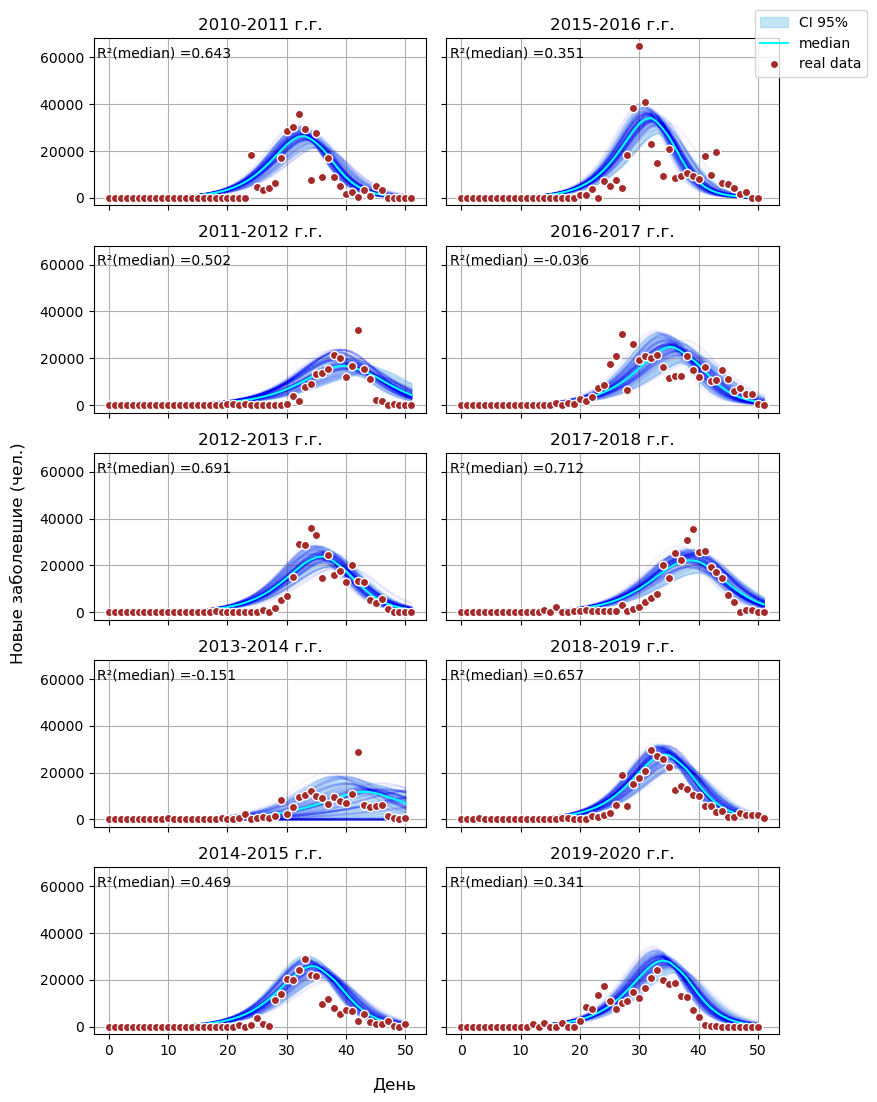

In [19]:
#epsilon=10000 tune=2500, draws=500 tune="scaling", proposal_dist=pm.NormalProposal
fig, ax = plt.subplots(5,2, sharex=True, sharey=True, figsize=(8,11))
init_infect = [100]

for idx, year in enumerate(tqdm([2010,2011,2012,2013,2014,
                                2015,2016,2017,2018,2019])):
    data_orig = EpidData('spb', './', f'7-01-{year}', f'6-20-{year+1}')
    model = TotalBRModel()
    d = Calibration(init_infect, model, data_orig)
    idata, data, simulation_func, pm_model = d.mcmc_calibration()
    col = 0
    if year >= 2015:
        col = 1
        idx -= 5
    fig_for_subplot(ax[idx, col], idata, year)
    
fig.supxlabel('День')   
fig.supylabel('Новые заболевшие (чел.)')

handles, labels = ax[-1,0].get_legend_handles_labels()
fig.tight_layout()
fig.legend(handles, labels, bbox_to_anchor=(1.1, 1));

In [73]:
# последний год
posterior = idata.posterior.stack(samples=("draw", "chain"))
alpha = posterior["a"].median().values
beta = posterior["b"].median().values
alpha, beta

(array(0.82157327), array(0.97649548))

# 40 weeks

  0%|          | 0/10 [00:00<?, ?it/s]

The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is s

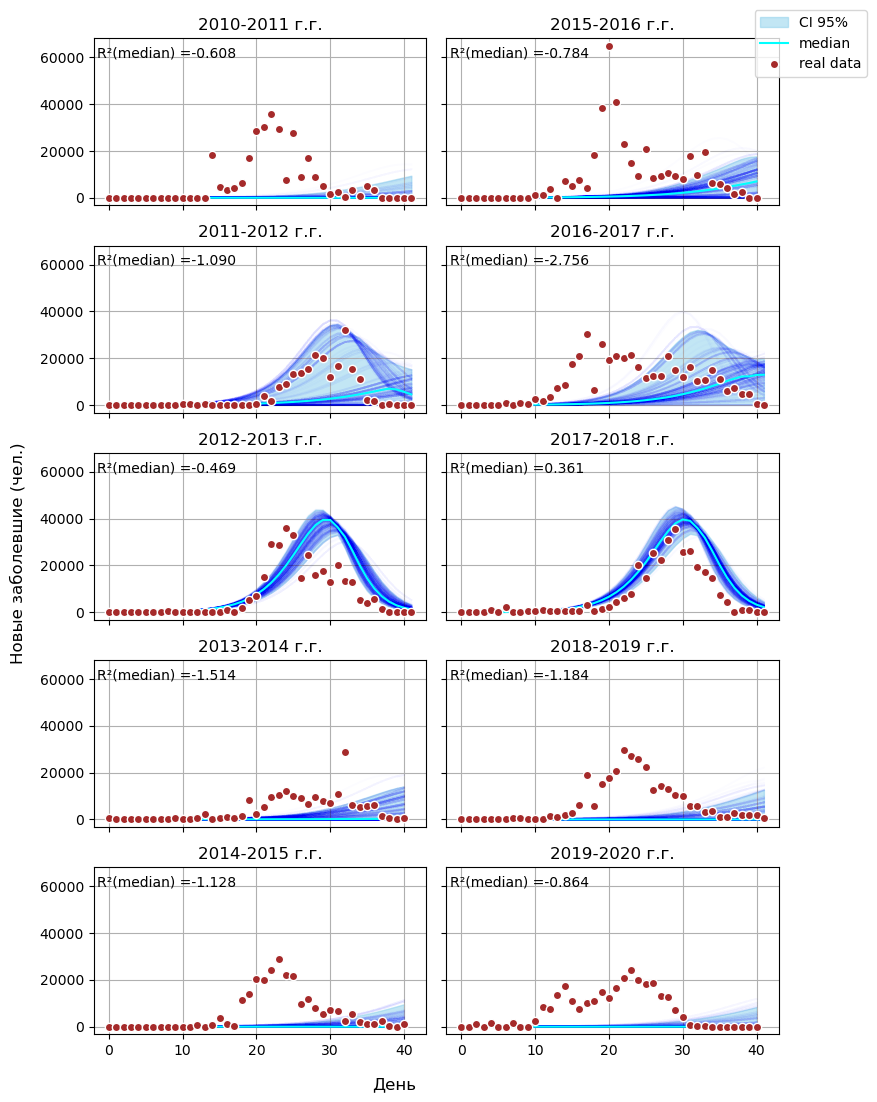

In [21]:
# 40 дней

fig, ax = plt.subplots(5,2, sharex=True, sharey=True, figsize=(8,11))
init_infect = [100]

for idx, year in enumerate(tqdm([2010,2011,2012,2013,2014,
                                2015,2016,2017,2018,2019])):
    data_orig = EpidData('spb', './', f'7-01-{year}', f'6-20-{year+1}')
    model = TotalBRModel()
    d = Calibration(init_infect, model, data_orig.iloc[10:])
    idata, data, simulation_func, pm_model = d.mcmc_calibration()
    col = 0
    if year >= 2015:
        col = 1
        idx -= 5
    fig_for_subplot(ax[idx, col], idata, year)
    
fig.supxlabel('День')   
fig.supylabel('Новые заболевшие (чел.)')

handles, labels = ax[-1,0].get_legend_handles_labels()
fig.tight_layout()
fig.legend(handles, labels, bbox_to_anchor=(1.1, 1));

## 40 weeks; rho

  0%|          | 0/10 [00:00<?, ?it/s]

The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is s

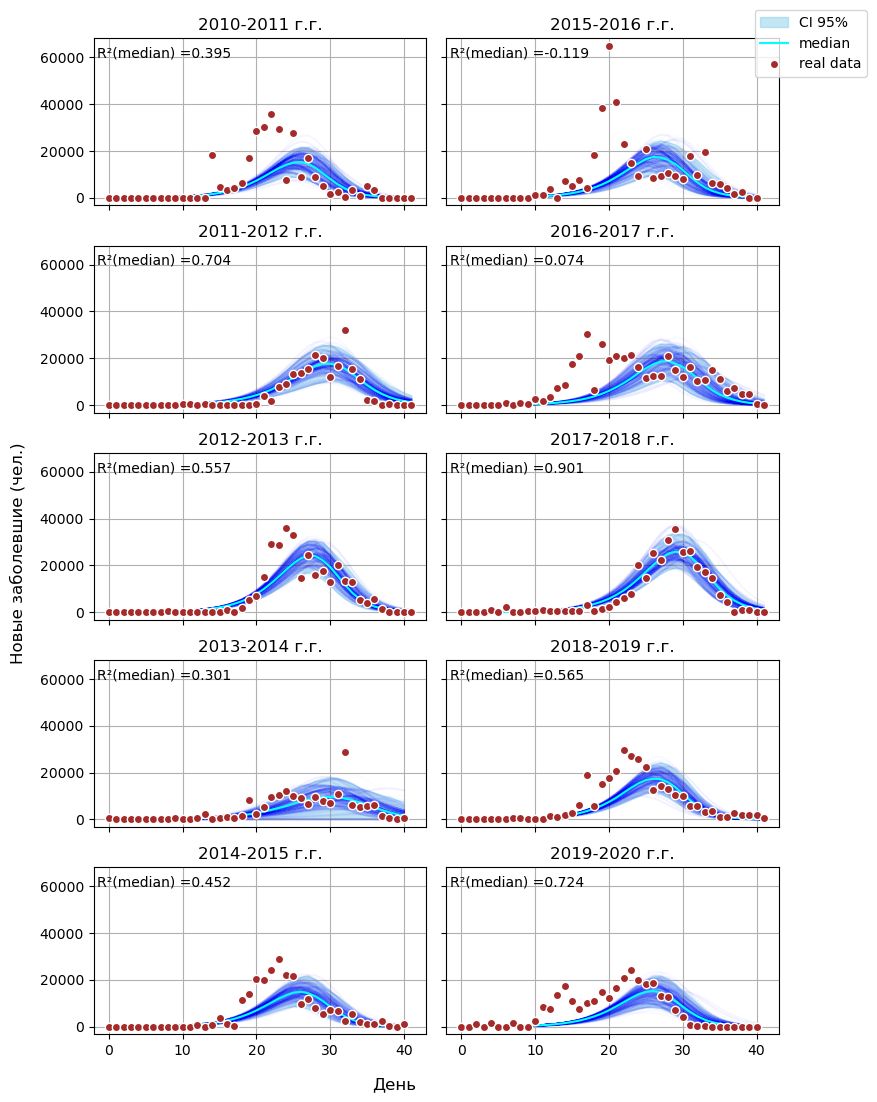

In [333]:
# 40 дней; rho с априорным
fig, ax = plt.subplots(5,2, sharex=True, sharey=True, figsize=(8,11))
init_infect = [100]
rrho = []
for idx, year in enumerate(tqdm([2010,2011,2012,2013,2014,
                                2015,2016,2017,2018,2019])):
    data_orig = EpidData('spb', './', f'7-01-{year}', f'6-20-{year+1}')
    model = TotalBRModel()
    d = Calibration(init_infect, model, data_orig.iloc[10:])
    idata, data, simulation_func, pm_model = d.mcmc_calibration(with_rho=True)
    posterior = idata.posterior.stack(samples=("draw", "chain"))
    rrho.append(posterior["rho"].median().values)
    
    col = 0
    if year >= 2015:
        col = 1
        idx -= 5
    fig_for_subplot(ax[idx, col], idata, year, with_rho=True)
    
fig.supxlabel('День')   
fig.supylabel('Новые заболевшие (чел.)')

handles, labels = ax[-1,0].get_legend_handles_labels()
fig.tight_layout()
fig.legend(handles, labels, bbox_to_anchor=(1.1, 1));

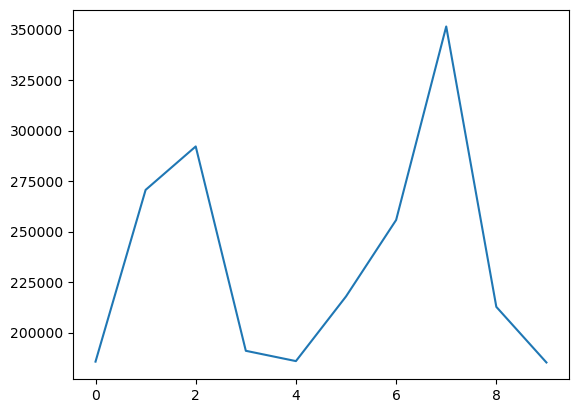

In [335]:
plt.plot(rrho)

## 40 weeks; rho and init_infect

In [7]:
from timeit import default_timer as timer

In [8]:
start = timer()
print('sffsf')
end = timer()
print(end - start) 

sffsf
0.0004343999898992479


  0%|          | 0/10 [00:00<?, ?it/s]

The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is s

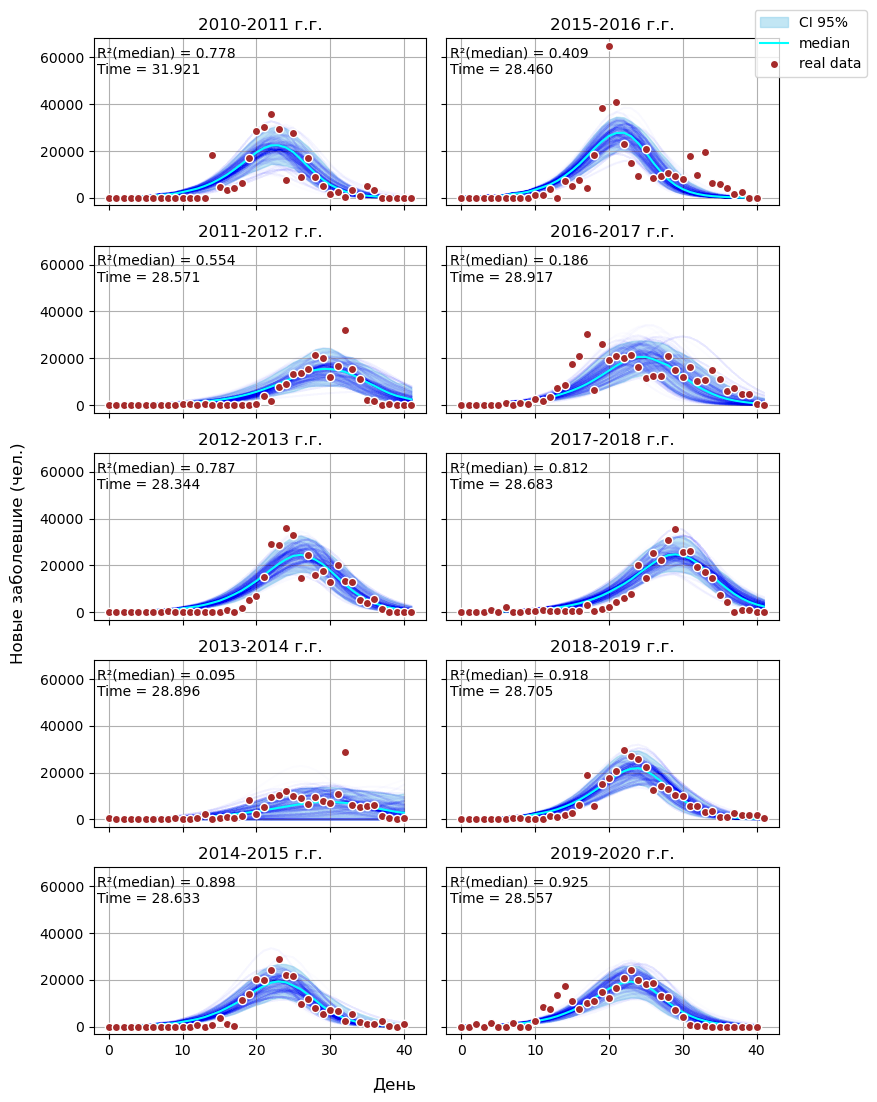

In [9]:
# 40 дней; rho and init_pop
fig, ax = plt.subplots(5,2, sharex=True, sharey=True, figsize=(8,11))
init_infect = [100]
rrho, ii, alphas, betas = [], [], [], []

for idx, year in enumerate(tqdm([2010,2011,2012,2013,2014,
                                2015,2016,2017,2018,2019])):
    data_orig = EpidData('spb', './', f'7-01-{year}', f'6-20-{year+1}')
    model = TotalBRModel()
    d = Calibration(init_infect, model, data_orig.iloc[10:])
    
    start = timer()
    idata, data, simulation_func, pm_model = d.mcmc_calibration(with_rho=True, with_initi=True, 
                                                                verbose=False)
    end = timer()
    posterior = idata.posterior.stack(samples=("draw", "chain"))
    rrho.append(posterior["rho"].median().values)
    ii.append(posterior["init_inf"].median().values)
    alphas.append(posterior["a"].median().values)
    betas.append(posterior["b"].median().values)
    
    col = 0
    if year >= 2015:
        col = 1
        idx -= 5
        
    fig_for_subplot(ax[idx, col], idata, year, with_rho=True, with_initi=True, 
                    time=end-start)
    
fig.supxlabel('День')   
fig.supylabel('Новые заболевшие (чел.)')

handles, labels = ax[-1,0].get_legend_handles_labels()
fig.tight_layout()
fig.legend(handles, labels, bbox_to_anchor=(1.1, 1));

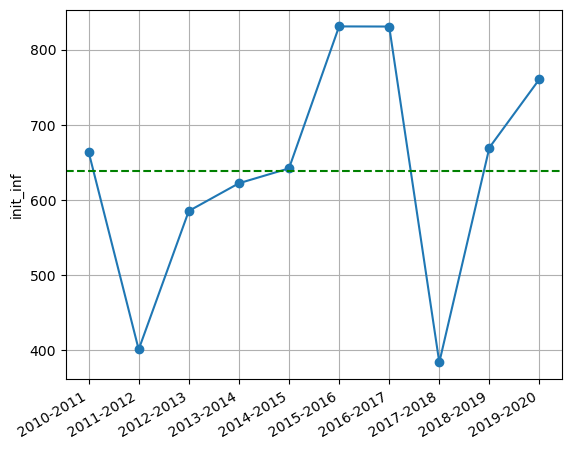

In [10]:
years = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
years_labels = [f'{i}-{i+1}' for i in years]

plt.plot(ii,'o-')
plt.grid()
plt.axhline(np.mean(ii), color='green', ls='--')
plt.ylabel('init_inf')
plt.xticks(np.arange(10),years_labels,rotation=30,ha='right');

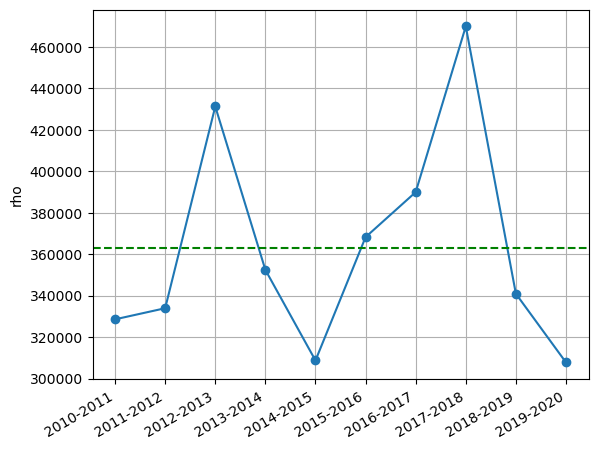

In [11]:
plt.plot(rrho,'o-')
plt.grid()
plt.axhline(np.mean(rrho), color='green', ls='--')
plt.ylabel('rho')
plt.xticks(np.arange(10),years_labels,rotation=30,ha='right');

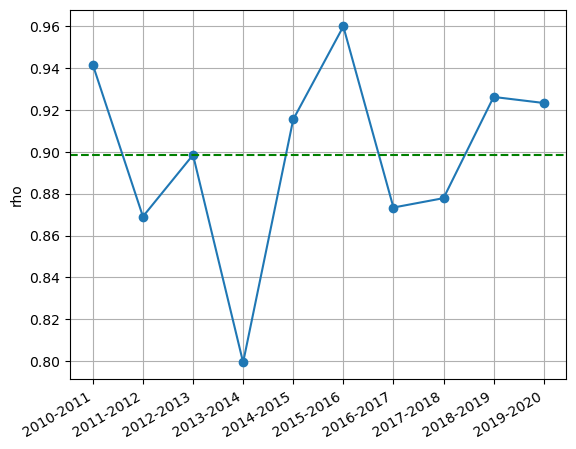

In [12]:
plt.plot(alphas,'o-')
plt.grid()
plt.axhline(np.mean(alphas), color='green', ls='--')
plt.ylabel('rho')
plt.xticks(np.arange(10),years_labels,rotation=30,ha='right');

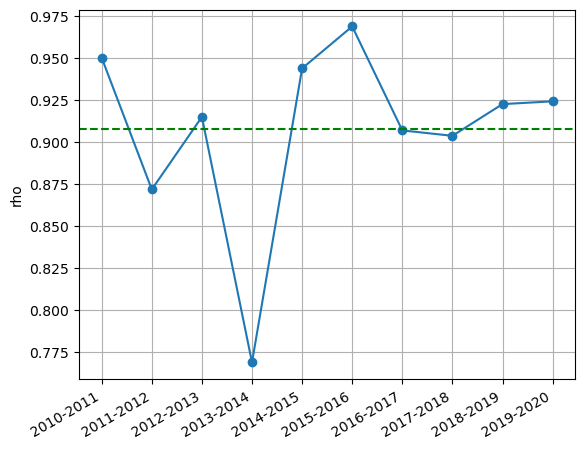

In [13]:
plt.plot(betas,'o-')
plt.grid()
plt.axhline(np.mean(betas), color='green', ls='--')
plt.ylabel('rho')
plt.xticks(np.arange(10),years_labels,rotation=30,ha='right');

## 40 weeks; init_infect

  0%|          | 0/10 [00:00<?, ?it/s]

The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is s

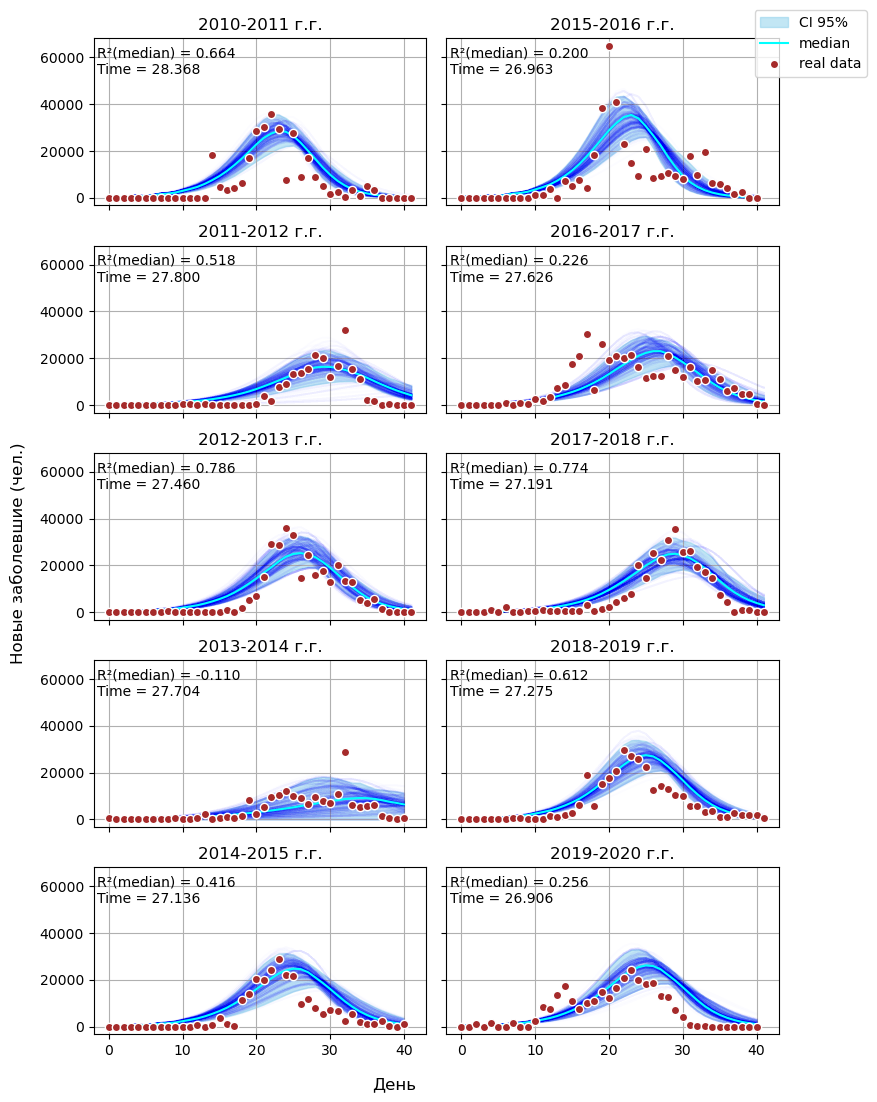

In [20]:
# 40 дней; init_pop
fig, ax = plt.subplots(5,2, sharex=True, sharey=True, figsize=(8,11))
init_infect = [100]
rrho, ii, alphas, betas = [], [], [], []

for idx, year in enumerate(tqdm([2010,2011,2012,2013,2014,
                                2015,2016,2017,2018,2019])):
    data_orig = EpidData('spb', './', f'7-01-{year}', f'6-20-{year+1}')
    model = TotalBRModel()
    d = Calibration(init_infect, model, data_orig.iloc[10:])
    
    start = timer()
    idata, data, simulation_func, pm_model = d.mcmc_calibration(with_rho=False, with_initi=True, 
                                                                verbose=False)
    end = timer()
    posterior = idata.posterior.stack(samples=("draw", "chain"))
    #rrho.append(posterior["rho"].median().values)
    ii.append(posterior["init_inf"].median().values)
    alphas.append(posterior["a"].median().values)
    betas.append(posterior["b"].median().values)
    
    col = 0
    if year >= 2015:
        col = 1
        idx -= 5
        
    fig_for_subplot(ax[idx, col], idata, year, with_rho=False, with_initi=True, 
                    time=end-start)
    
fig.supxlabel('День')   
fig.supylabel('Новые заболевшие (чел.)')

handles, labels = ax[-1,0].get_legend_handles_labels()
fig.tight_layout()
fig.legend(handles, labels, bbox_to_anchor=(1.1, 1));

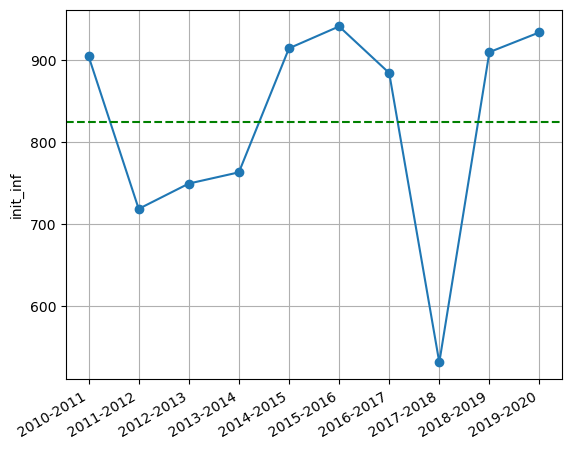

In [21]:
years = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
years_labels = [f'{i}-{i+1}' for i in years]

plt.plot(ii,'o-')
plt.grid()
plt.axhline(np.mean(ii), color='green', ls='--')
plt.ylabel('init_inf')
plt.xticks(np.arange(10),years_labels,rotation=30,ha='right');

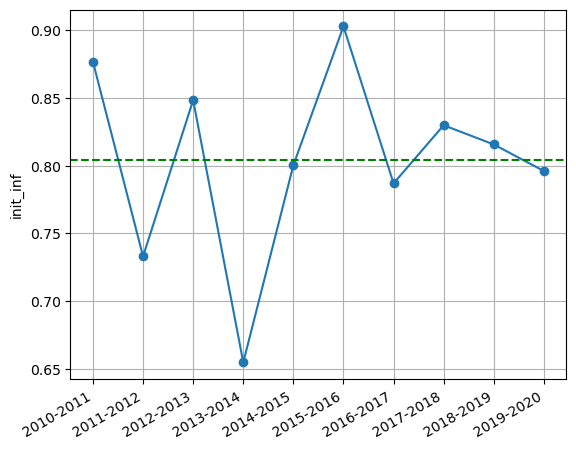

In [22]:
plt.plot(alphas,'o-')
plt.grid()
plt.axhline(np.mean(alphas), color='green', ls='--')
plt.ylabel('init_inf')
plt.xticks(np.arange(10),years_labels,rotation=30,ha='right');

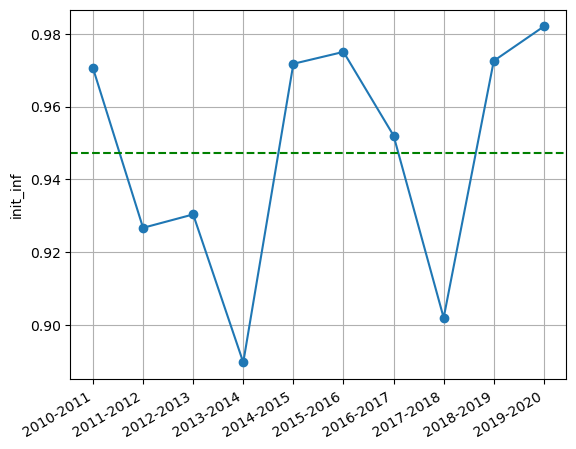

In [23]:
plt.plot(betas,'o-')
plt.grid()
plt.axhline(np.mean(betas), color='green', ls='--')
plt.ylabel('init_inf')
plt.xticks(np.arange(10),years_labels,rotation=30,ha='right');

The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


mean         sd      hdi_3%     hdi_97%  mcse_mean   mcse_sd  \
a[0]       0.947      0.043       0.870       1.000      0.003     0.002   
b[0]       0.960      0.037       0.887       1.000      0.003     0.002   
rho   259247.718  42981.998  186744.482  340323.715   3429.282  2487.291   

      ess_bulk  ess_tail  r_hat  
a[0]     156.0     331.0   1.02  
b[0]     159.0     180.0   1.03  
rho      163.0     132.0   1.05

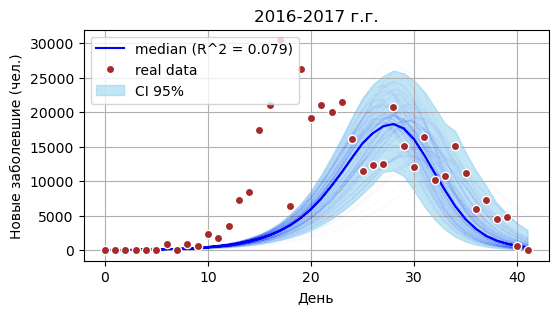

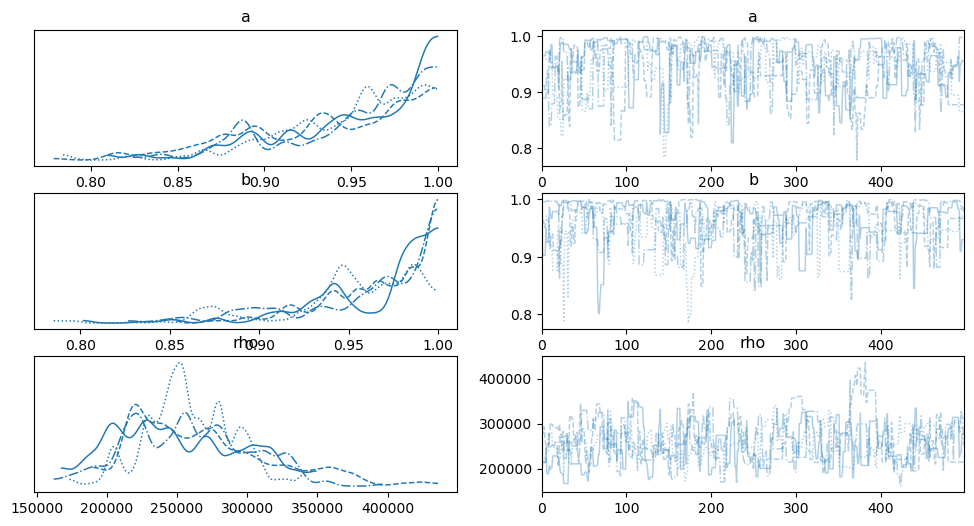

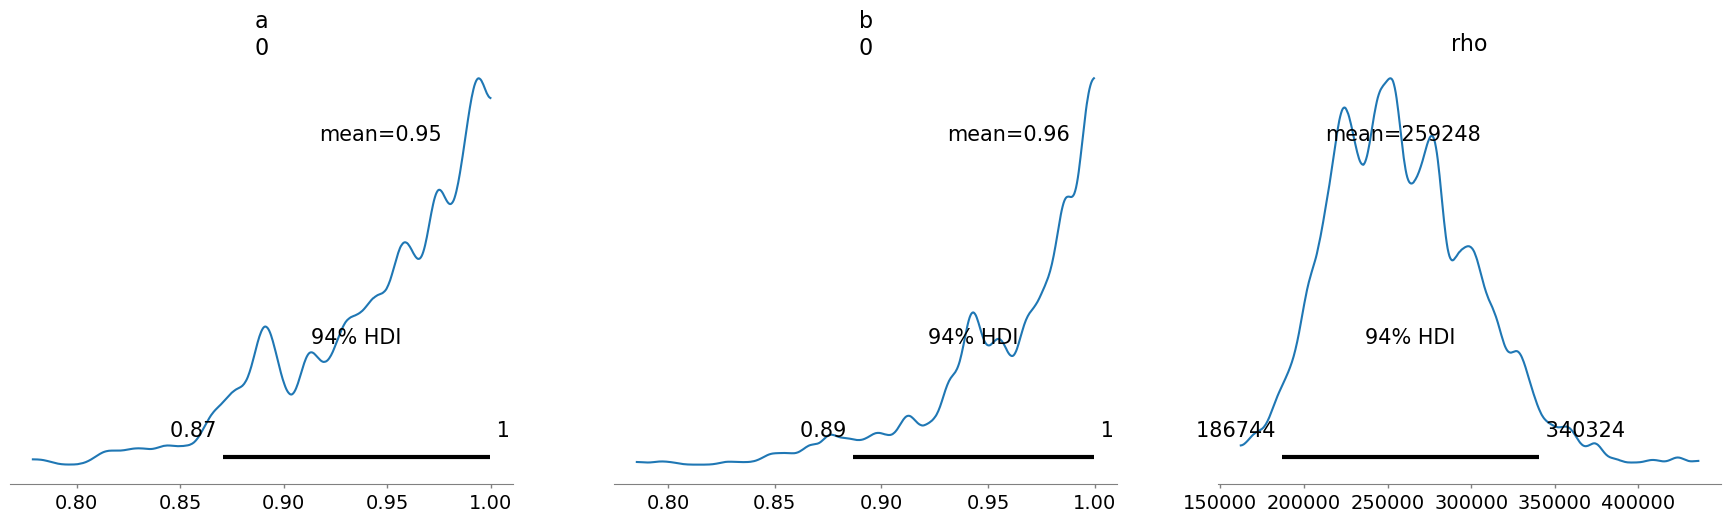

In [327]:
year=2016
data_orig = EpidData('spb', './', f'7-01-{year}', f'6-20-{year+1}')
model = TotalBRModel()
d = Calibration(init_infect, model, data_orig.iloc[10:])
idata, data, simulation_func, pm_model = d.mcmc_calibration(with_rho=True)

plots(idata, year, with_rho=True)